# benchmarking on omnipath


In [1]:
from scprint import scPrint
from scprint.tasks import GRNfer

from bengrn import BenGRN
import scanpy as sc

from bengrn.base import train_classifier

from anndata.utils import make_index_unique
from bengrn import compute_genie3
from grnndata import utils as grnutils
import numpy as np
import joblib
%load_ext autoreload
%autoreload 2 

import torch
torch.set_float32_matmul_precision('medium')

💡 connected lamindb: jkobject/scprint


/pasteur/appa/homes/jkalfon/miniconda3/envs/scprint17/lib/python3.10/site-packages/umap/__init__.py:9: ImportWarning: Tensorflow not installed; ParametricUMAP will be unavailable
  warn(


In [2]:
model = scPrint.load_from_checkpoint(
#    '../data/temp/o2uniqsx/epoch=18-step=133000.ckpt', precpt_gene_emb=None)
#    '../data/temp/vbd8bavn/epoch=19-step=100000.ckpt', precpt_gene_emb=None)
#    '../data/temp/1tghqqzx_dir/epoch=18-step=133000.ckpt', precpt_gene_emb=None)
    '/pasteur/zeus/projets/p02/ml4ig_hot/Users/jkalfon/scprint_scale/o2uniqsx/checkpoints/epoch=18-step=133000.ckpt', precpt_gene_emb=None)
NUM_GENES = 5000
MAXCELLS = 1024

[d3graph] INFO> Created a temporary directory at /local/scratch/tmp/tmp3spjj_qe


[d3graph] INFO> Writing /local/scratch/tmp/tmp3spjj_qe/_remote_module_non_scriptable.py


RuntimeError caught: scPrint is not attached to a `Trainer`.


In [3]:
CELLTYPES = [
    'kidney distal convoluted tubule epithelial cell',
    #'kidney loop of Henle thick ascending limb epithelial cell',
    'kidney collecting duct principal cell',
    #'mesangial cell',
    'blood vessel smooth muscle cell',
    'podocyte',
    #'macrophage',
    #'leukocyte',
    'kidney interstitial fibroblast',
    'endothelial cell'
]

In [4]:
#adata = sc.read_h5ad('/home/ml4ig1/scprint/.lamindb/yBCKp6HmXuHa0cZptMo7.h5ad')
adata = sc.read_h5ad('../data/yBCKp6HmXuHa0cZptMo7.h5ad')
adata.var["isTF"] = False
adata.var.loc[adata.var.symbol.isin(grnutils.TF), "isTF"] = True
adata

AnnData object with n_obs × n_vars = 15728 × 70116
    obs: 'donor_id', 'self_reported_ethnicity_ontology_term_id', 'organism_ontology_term_id', 'sample_uuid', 'sample_preservation_method', 'tissue_ontology_term_id', 'development_stage_ontology_term_id', 'tissue_section_uuid', 'tissue_section_thickness', 'library_uuid', 'assay_ontology_term_id', 'mapped_reference_annotation', 'is_primary_data', 'cell_type_ontology_term_id', 'author_cell_type', 'disease_ontology_term_id', 'sex_ontology_term_id', 'suspension_type', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'cell_culture', 'nnz', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'outlier', 'mt_outlier', 'leiden_3', 'leide

In [5]:
#model.normalization = "log"
model.organisms = ['NCBITaxon:9606','NCBITaxon:10090']

  0%|          | 0/54 [00:00<?, ?it/s]

  2%|▏         | 1/54 [00:03<02:56,  3.34s/it]

  4%|▎         | 2/54 [00:04<01:51,  2.14s/it]

  6%|▌         | 3/54 [00:05<01:29,  1.76s/it]

  7%|▋         | 4/54 [00:07<01:18,  1.58s/it]

  9%|▉         | 5/54 [00:08<01:12,  1.47s/it]

 11%|█         | 6/54 [00:09<01:08,  1.43s/it]

 13%|█▎        | 7/54 [00:11<01:05,  1.38s/it]

 15%|█▍        | 8/54 [00:12<01:02,  1.37s/it]

 17%|█▋        | 9/54 [00:13<01:01,  1.36s/it]

 19%|█▊        | 10/54 [00:15<00:59,  1.35s/it]

 20%|██        | 11/54 [00:16<00:56,  1.32s/it]

 22%|██▏       | 12/54 [00:17<00:54,  1.29s/it]

 24%|██▍       | 13/54 [00:19<01:02,  1.52s/it]

 26%|██▌       | 14/54 [00:21<00:58,  1.47s/it]

 28%|██▊       | 15/54 [00:22<00:55,  1.43s/it]

 30%|██▉       | 16/54 [00:23<00:53,  1.41s/it]

 31%|███▏      | 17/54 [00:29<01:42,  2.76s/it]

 33%|███▎      | 18/54 [00:31<01:25,  2.36s/it]

 35%|███▌      | 19/54 [00:34<01:32,  2.63s/it]

 37%|███▋      | 20/54 [00:39<01:57,  3.45s/it]

 39%|███▉      | 21/54 [00:43<02:00,  3.67s/it]

 41%|████      | 22/54 [00:47<01:53,  3.55s/it]

 43%|████▎     | 23/54 [00:49<01:41,  3.29s/it]

 44%|████▍     | 24/54 [00:53<01:38,  3.28s/it]

 46%|████▋     | 25/54 [00:56<01:36,  3.34s/it]

 48%|████▊     | 26/54 [00:59<01:30,  3.22s/it]

 50%|█████     | 27/54 [01:03<01:29,  3.31s/it]

 52%|█████▏    | 28/54 [01:05<01:22,  3.18s/it]

 54%|█████▎    | 29/54 [01:07<01:09,  2.79s/it]

 56%|█████▌    | 30/54 [01:09<00:56,  2.37s/it]

 57%|█████▋    | 31/54 [01:10<00:48,  2.09s/it]

 59%|█████▉    | 32/54 [01:12<00:41,  1.88s/it]

 61%|██████    | 33/54 [01:13<00:36,  1.73s/it]

 63%|██████▎   | 34/54 [01:14<00:32,  1.62s/it]

 65%|██████▍   | 35/54 [01:16<00:29,  1.54s/it]

 67%|██████▋   | 36/54 [01:17<00:26,  1.50s/it]

 69%|██████▊   | 37/54 [01:18<00:25,  1.48s/it]

 70%|███████   | 38/54 [01:20<00:22,  1.42s/it]

 72%|███████▏  | 39/54 [01:21<00:20,  1.38s/it]

 74%|███████▍  | 40/54 [01:22<00:18,  1.34s/it]

 76%|███████▌  | 41/54 [01:24<00:17,  1.32s/it]

 78%|███████▊  | 42/54 [01:25<00:16,  1.34s/it]

 80%|███████▉  | 43/54 [01:26<00:14,  1.32s/it]

 81%|████████▏ | 44/54 [01:27<00:13,  1.30s/it]

 83%|████████▎ | 45/54 [01:29<00:11,  1.28s/it]

 85%|████████▌ | 46/54 [01:30<00:10,  1.28s/it]

 87%|████████▋ | 47/54 [01:31<00:08,  1.28s/it]

 89%|████████▉ | 48/54 [01:33<00:07,  1.27s/it]

 91%|█████████ | 49/54 [01:34<00:06,  1.27s/it]

 93%|█████████▎| 50/54 [01:35<00:05,  1.26s/it]

 94%|█████████▍| 51/54 [01:36<00:03,  1.24s/it]

 96%|█████████▋| 52/54 [01:38<00:02,  1.26s/it]

 98%|█████████▊| 53/54 [01:39<00:01,  1.26s/it]

100%|██████████| 54/54 [01:39<00:00,  1.07s/it]

100%|██████████| 54/54 [01:40<00:00,  1.85s/it]

base enrichment


Top central genes: []
The DataFrame contains only the same values.


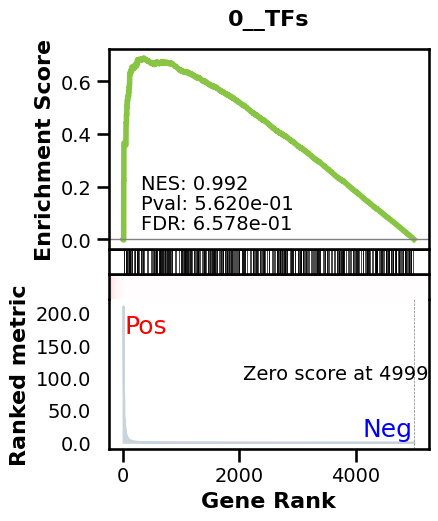

_________________________________________
TF specific enrichment


found some significant results for  14.705882352941176 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3484 genes
intersection pct: 0.6968
precision:  0.0008261483363013599 
recall:  1.0 
random precision: 0.0008263855307705822


  0%|          | 0/128 [00:00<?, ?it/s]

  5%|▍         | 6/128 [00:00<00:02, 59.44it/s]

  9%|▉         | 12/128 [00:00<00:01, 59.49it/s]

 14%|█▍        | 18/128 [00:00<00:01, 59.30it/s]

 19%|█▉        | 24/128 [00:00<00:01, 59.24it/s]

 23%|██▎       | 30/128 [00:00<00:01, 59.07it/s]

 28%|██▊       | 36/128 [00:00<00:01, 59.12it/s]

 33%|███▎      | 42/128 [00:00<00:01, 58.68it/s]

 38%|███▊      | 48/128 [00:00<00:01, 58.83it/s]

 42%|████▏     | 54/128 [00:00<00:01, 58.75it/s]

 47%|████▋     | 60/128 [00:01<00:01, 58.60it/s]

 52%|█████▏    | 66/128 [00:01<00:01, 58.87it/s]

 56%|█████▋    | 72/128 [00:01<00:00, 58.84it/s]

 61%|██████    | 78/128 [00:01<00:00, 59.06it/s]

 66%|██████▌   | 84/128 [00:01<00:00, 58.95it/s]

 70%|███████   | 90/128 [00:01<00:00, 56.52it/s]

 75%|███████▌  | 96/128 [00:01<00:00, 57.31it/s]

 80%|███████▉  | 102/128 [00:01<00:00, 58.01it/s]

 84%|████████▍ | 108/128 [00:01<00:00, 58.49it/s]

 89%|████████▉ | 114/128 [00:01<00:00, 58.53it/s]

 94%|█████████▍| 120/128 [00:02<00:00, 58.57it/s]

 98%|█████████▊| 126/128 [00:02<00:00, 58.94it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:756: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:02<00:00, 58.56it/s]

Area Under Precision-Recall Curve (AUPRC):  0.0008763312851398199
EPR: 2.6620469453287052


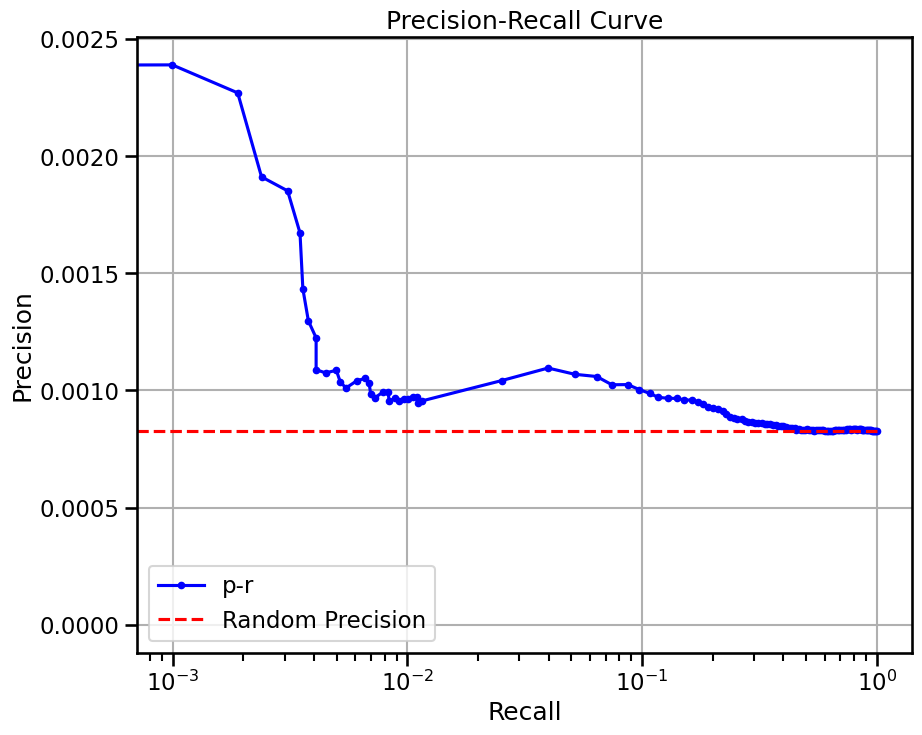

base enrichment


Top central genes: []


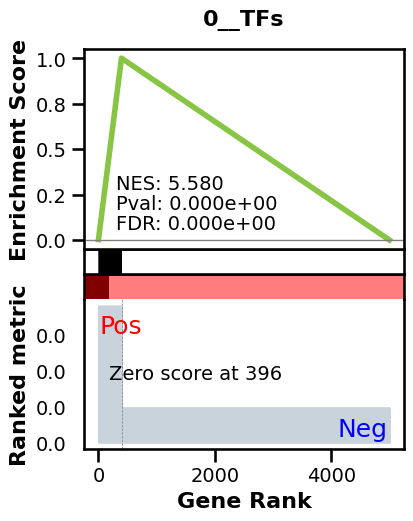

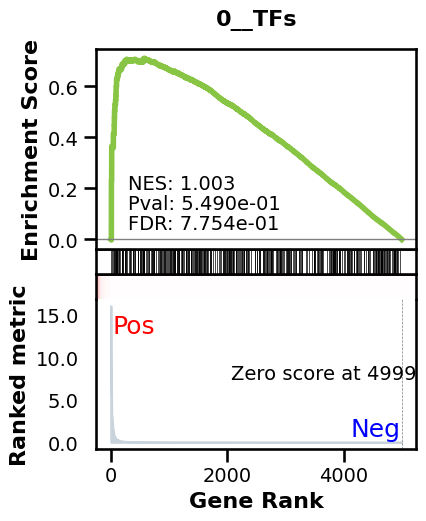

_________________________________________
TF specific enrichment


found some significant results for  17.647058823529413 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3484 genes
intersection pct: 0.6968
precision:  0.0030067336747127975 
recall:  0.3405464698843239 
random precision: 0.0008263855307705822


  0%|          | 0/128 [00:00<?, ?it/s]

  5%|▌         | 7/128 [00:00<00:01, 60.50it/s]

 11%|█         | 14/128 [00:00<00:01, 60.68it/s]

 16%|█▋        | 21/128 [00:00<00:01, 60.64it/s]

 22%|██▏       | 28/128 [00:00<00:01, 60.85it/s]

 27%|██▋       | 35/128 [00:00<00:01, 60.96it/s]

 33%|███▎      | 42/128 [00:00<00:01, 60.96it/s]

 38%|███▊      | 49/128 [00:00<00:01, 60.89it/s]

 44%|████▍     | 56/128 [00:00<00:01, 61.01it/s]

 49%|████▉     | 63/128 [00:01<00:01, 61.07it/s]

 55%|█████▍    | 70/128 [00:01<00:00, 61.05it/s]

 60%|██████    | 77/128 [00:01<00:00, 60.95it/s]

 66%|██████▌   | 84/128 [00:01<00:00, 60.78it/s]

 71%|███████   | 91/128 [00:01<00:00, 60.66it/s]

 77%|███████▋  | 98/128 [00:01<00:00, 60.73it/s]

 82%|████████▏ | 105/128 [00:01<00:00, 60.59it/s]

 88%|████████▊ | 112/128 [00:01<00:00, 60.49it/s]

 93%|█████████▎| 119/128 [00:01<00:00, 60.44it/s]

 98%|█████████▊| 126/128 [00:02<00:00, 60.25it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:756: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:02<00:00, 60.66it/s]

Area Under Precision-Recall Curve (AUPRC):  0.0016631812655792195
EPR: 4.246105316851987


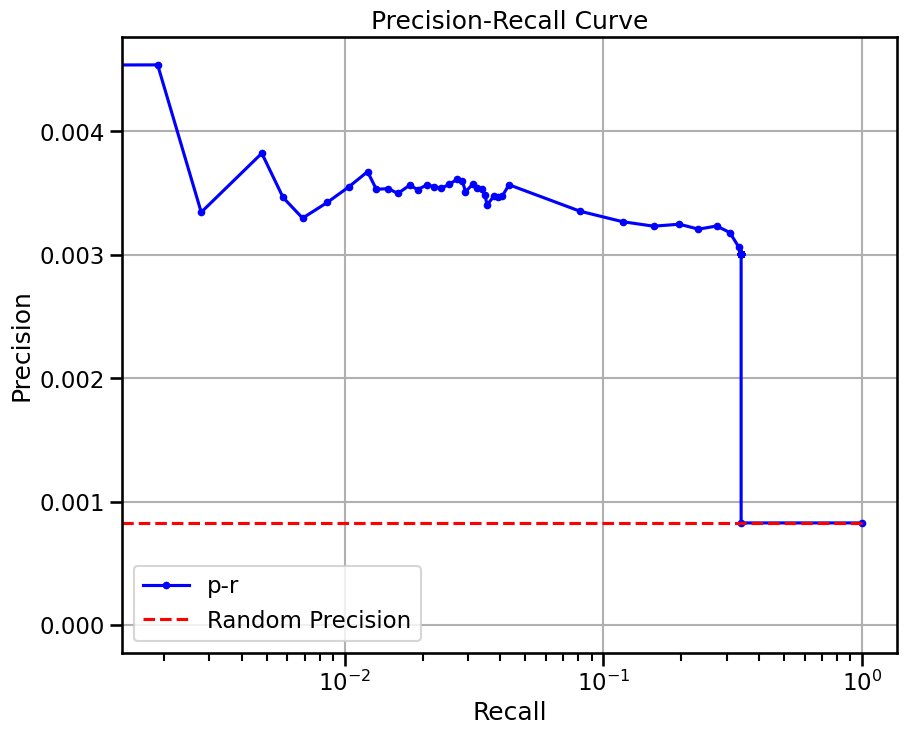

true elem 10028 ...


doing classification....


metrics {'used_heads': 3, 'precision': 0.0008314620117426245, 'random_precision': 0.0008314620117426245, 'recall': 1.0, 'predicted_true': 4855303.0, 'number_of_true': 4037.0}


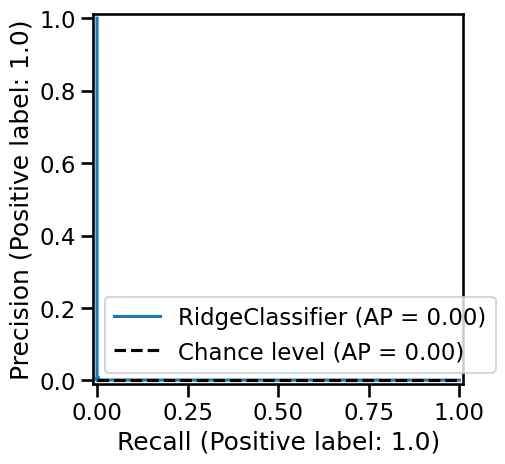

base enrichment


Top central genes: []
The DataFrame contains only the same values.


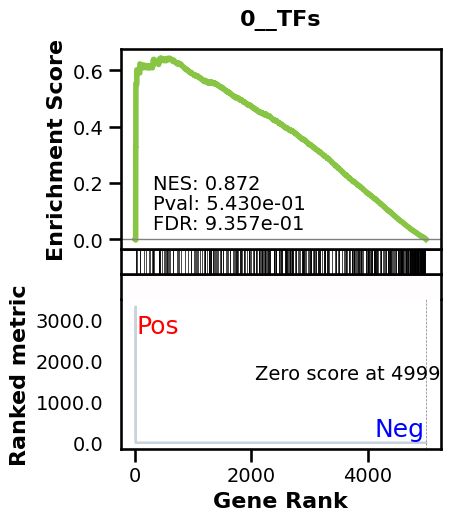

_________________________________________
TF specific enrichment


found some significant results for  2.9411764705882355 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3484 genes
intersection pct: 0.6968
precision:  0.0008261483363013599 
recall:  1.0 
random precision: 0.0008263855307705822


  0%|          | 0/128 [00:00<?, ?it/s]

  5%|▌         | 7/128 [00:00<00:02, 60.42it/s]

 11%|█         | 14/128 [00:00<00:01, 60.28it/s]

 16%|█▋        | 21/128 [00:00<00:01, 59.56it/s]

 21%|██        | 27/128 [00:00<00:01, 59.53it/s]

 26%|██▌       | 33/128 [00:00<00:01, 59.51it/s]

 30%|███       | 39/128 [00:00<00:01, 59.50it/s]

 35%|███▌      | 45/128 [00:00<00:01, 59.49it/s]

 40%|███▉      | 51/128 [00:00<00:01, 59.49it/s]

 45%|████▍     | 57/128 [00:00<00:01, 59.50it/s]

 49%|████▉     | 63/128 [00:01<00:01, 59.51it/s]

 54%|█████▍    | 69/128 [00:01<00:00, 59.46it/s]

 59%|█████▊    | 75/128 [00:01<00:00, 59.42it/s]

 63%|██████▎   | 81/128 [00:01<00:00, 59.44it/s]

 68%|██████▊   | 87/128 [00:01<00:00, 59.45it/s]

 73%|███████▎  | 93/128 [00:01<00:00, 59.47it/s]

 77%|███████▋  | 99/128 [00:01<00:00, 59.47it/s]

 82%|████████▏ | 105/128 [00:01<00:00, 59.51it/s]

 87%|████████▋ | 111/128 [00:01<00:00, 59.53it/s]

 91%|█████████▏| 117/128 [00:01<00:00, 59.56it/s]

 96%|█████████▌| 123/128 [00:02<00:00, 59.51it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:756: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:02<00:00, 59.50it/s]

Area Under Precision-Recall Curve (AUPRC):  0.0009939462831802626
EPR: 4.979989927628857


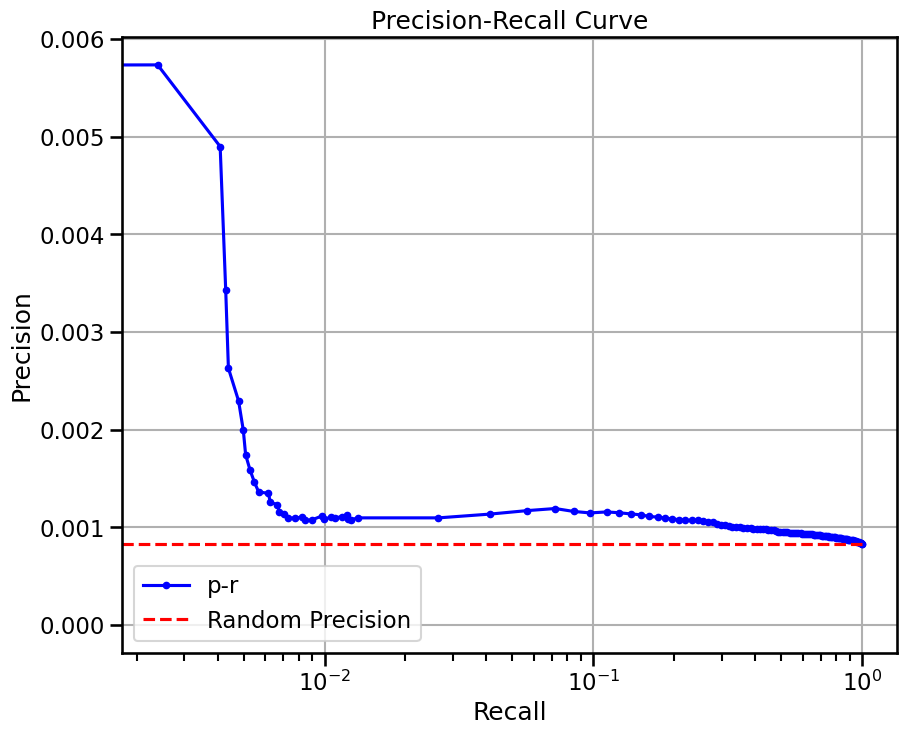

base enrichment


Top central genes: []


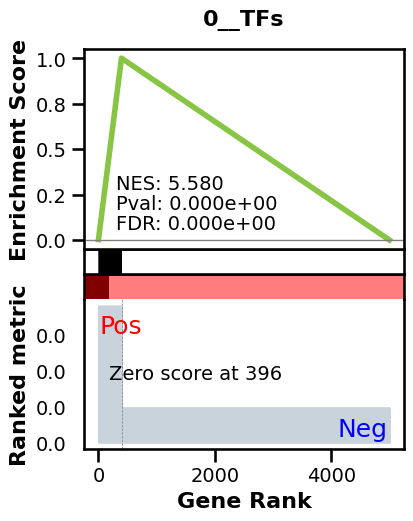

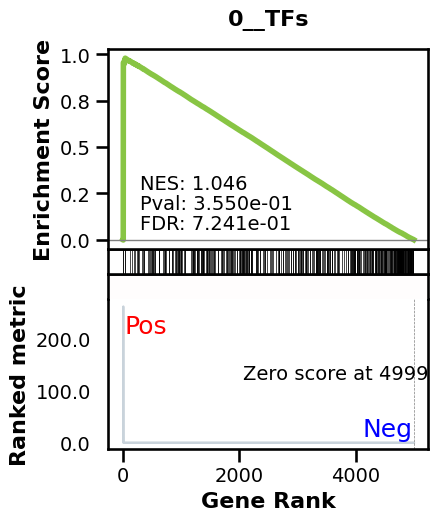

_________________________________________
TF specific enrichment


found some significant results for  8.823529411764707 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3484 genes
intersection pct: 0.6968
precision:  0.0030067336747127975 
recall:  0.3405464698843239 
random precision: 0.0008263855307705822


  0%|          | 0/128 [00:00<?, ?it/s]

  5%|▍         | 6/128 [00:00<00:02, 59.54it/s]

  9%|▉         | 12/128 [00:00<00:01, 59.31it/s]

 14%|█▍        | 18/128 [00:00<00:01, 59.38it/s]

 19%|█▉        | 24/128 [00:00<00:01, 59.53it/s]

 24%|██▍       | 31/128 [00:00<00:01, 59.88it/s]

 29%|██▉       | 37/128 [00:00<00:01, 59.73it/s]

 34%|███▎      | 43/128 [00:00<00:01, 59.66it/s]

 38%|███▊      | 49/128 [00:00<00:01, 59.60it/s]

 43%|████▎     | 55/128 [00:00<00:01, 59.57it/s]

 48%|████▊     | 61/128 [00:01<00:01, 59.44it/s]

 52%|█████▏    | 67/128 [00:01<00:01, 59.45it/s]

 57%|█████▋    | 73/128 [00:01<00:00, 59.47it/s]

 62%|██████▏   | 79/128 [00:01<00:00, 59.51it/s]

 66%|██████▋   | 85/128 [00:01<00:00, 59.49it/s]

 71%|███████   | 91/128 [00:01<00:00, 59.53it/s]

 76%|███████▌  | 97/128 [00:01<00:00, 59.51it/s]

 80%|████████  | 103/128 [00:01<00:00, 59.55it/s]

 85%|████████▌ | 109/128 [00:01<00:00, 59.66it/s]

 90%|████████▉ | 115/128 [00:01<00:00, 59.69it/s]

 95%|█████████▍| 121/128 [00:02<00:00, 59.63it/s]

 99%|█████████▉| 127/128 [00:02<00:00, 59.56it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:756: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:02<00:00, 59.52it/s]

Area Under Precision-Recall Curve (AUPRC):  0.00222697815620021
EPR: 12.416585640502555


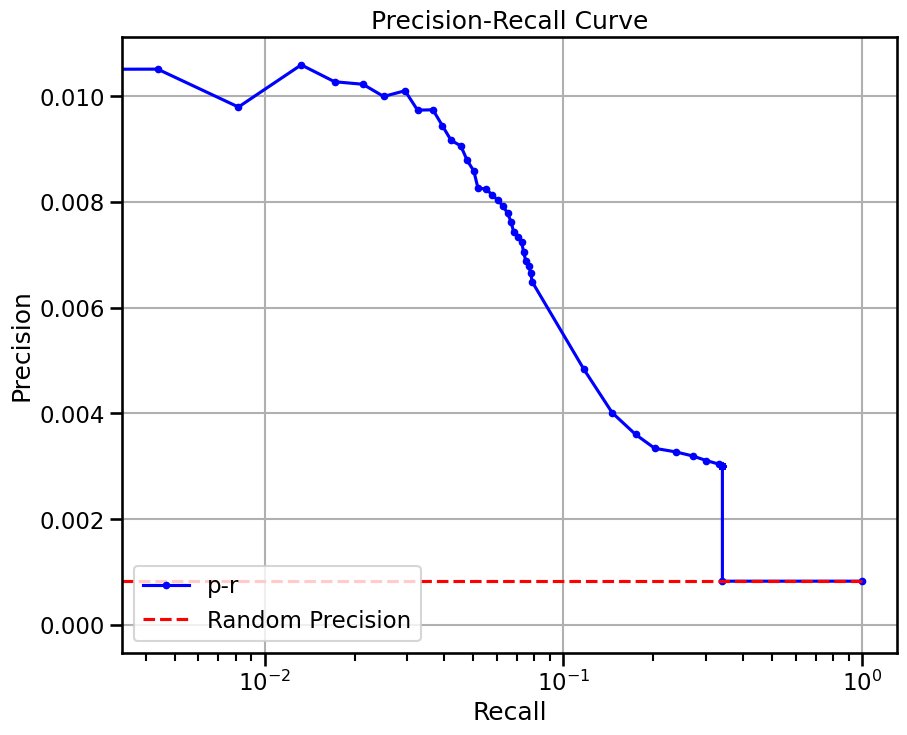

  0%|          | 0/22 [00:00<?, ?it/s]

  5%|▍         | 1/22 [00:02<00:49,  2.37s/it]

  9%|▉         | 2/22 [00:03<00:33,  1.67s/it]

 14%|█▎        | 3/22 [00:04<00:27,  1.47s/it]

 18%|█▊        | 4/22 [00:05<00:24,  1.36s/it]

 23%|██▎       | 5/22 [00:07<00:22,  1.30s/it]

 27%|██▋       | 6/22 [00:08<00:20,  1.27s/it]

 32%|███▏      | 7/22 [00:09<00:18,  1.25s/it]

 36%|███▋      | 8/22 [00:10<00:17,  1.23s/it]

 41%|████      | 9/22 [00:11<00:15,  1.21s/it]

 45%|████▌     | 10/22 [00:13<00:14,  1.21s/it]

 50%|█████     | 11/22 [00:14<00:13,  1.21s/it]

 55%|█████▍    | 12/22 [00:16<00:14,  1.40s/it]

 59%|█████▉    | 13/22 [00:17<00:12,  1.35s/it]

 64%|██████▎   | 14/22 [00:18<00:10,  1.33s/it]

 68%|██████▊   | 15/22 [00:20<00:09,  1.32s/it]

 73%|███████▎  | 16/22 [00:21<00:07,  1.30s/it]

 77%|███████▋  | 17/22 [00:22<00:06,  1.29s/it]

 82%|████████▏ | 18/22 [00:23<00:05,  1.27s/it]

 86%|████████▋ | 19/22 [00:24<00:03,  1.25s/it]

 91%|█████████ | 20/22 [00:26<00:02,  1.23s/it]

 95%|█████████▌| 21/22 [00:27<00:01,  1.21s/it]

100%|██████████| 22/22 [00:28<00:00,  1.10s/it]

100%|██████████| 22/22 [00:28<00:00,  1.29s/it]

base enrichment


Top central genes: []
The DataFrame contains only the same values.


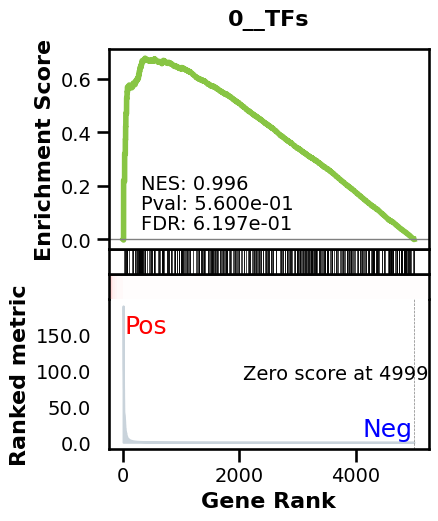

_________________________________________
TF specific enrichment


found some significant results for  15.625 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3518 genes
intersection pct: 0.7036
precision:  0.0012585320164533508 
recall:  1.0 
random precision: 0.001258889858937415


  0%|          | 0/128 [00:00<?, ?it/s]

  5%|▍         | 6/128 [00:00<00:02, 55.47it/s]

  9%|▉         | 12/128 [00:00<00:02, 55.46it/s]

 14%|█▍        | 18/128 [00:00<00:01, 55.32it/s]

 19%|█▉        | 24/128 [00:00<00:01, 55.37it/s]

 23%|██▎       | 30/128 [00:00<00:01, 55.08it/s]

 28%|██▊       | 36/128 [00:00<00:01, 55.11it/s]

 33%|███▎      | 42/128 [00:00<00:01, 55.20it/s]

 38%|███▊      | 48/128 [00:00<00:01, 55.24it/s]

 42%|████▏     | 54/128 [00:00<00:01, 55.20it/s]

 47%|████▋     | 60/128 [00:01<00:01, 55.21it/s]

 52%|█████▏    | 66/128 [00:01<00:01, 55.22it/s]

 56%|█████▋    | 72/128 [00:01<00:01, 55.26it/s]

 61%|██████    | 78/128 [00:01<00:00, 55.30it/s]

 66%|██████▌   | 84/128 [00:01<00:00, 55.30it/s]

 70%|███████   | 90/128 [00:01<00:00, 55.34it/s]

 75%|███████▌  | 96/128 [00:01<00:00, 55.33it/s]

 80%|███████▉  | 102/128 [00:01<00:00, 55.35it/s]

 84%|████████▍ | 108/128 [00:01<00:00, 55.25it/s]

 89%|████████▉ | 114/128 [00:02<00:00, 55.23it/s]

 94%|█████████▍| 120/128 [00:02<00:00, 55.30it/s]

 98%|█████████▊| 126/128 [00:02<00:00, 55.33it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:756: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:02<00:00, 55.25it/s]

Area Under Precision-Recall Curve (AUPRC):  0.0013994035169918654
EPR: 0.7134623715815356


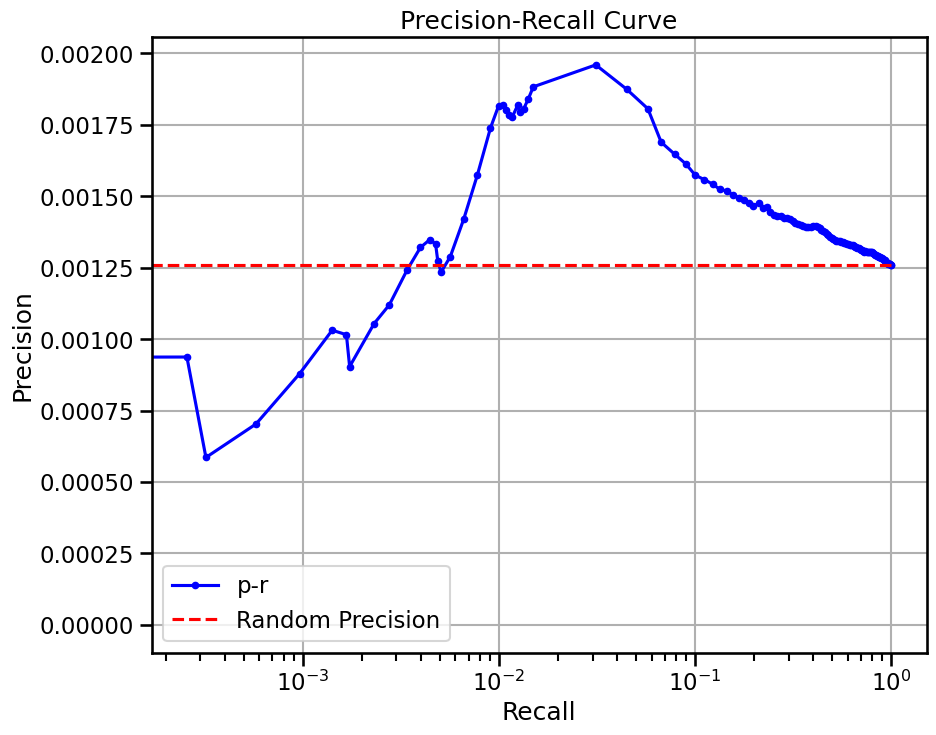

base enrichment


Top central genes: []


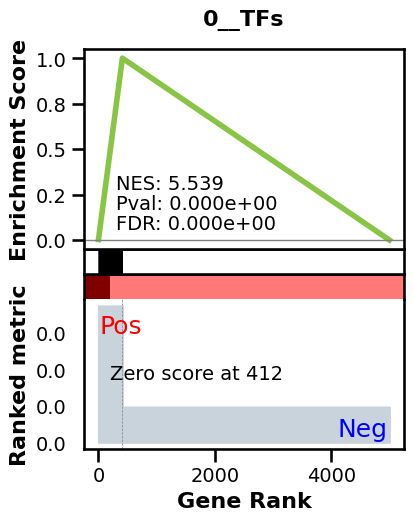

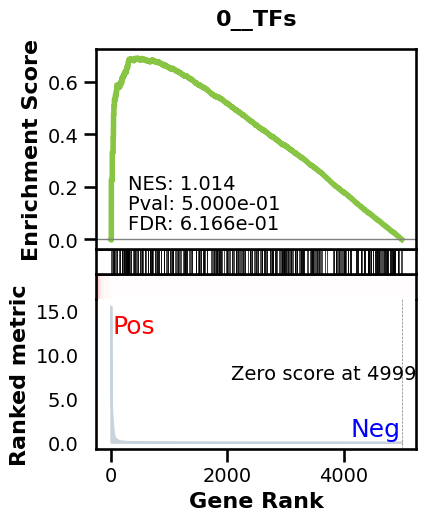

_________________________________________
TF specific enrichment


found some significant results for  9.375 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3518 genes
intersection pct: 0.7036
precision:  0.005945748396004223 
recall:  0.4700179763739086 
random precision: 0.001258889858937415


  0%|          | 0/128 [00:00<?, ?it/s]

  5%|▍         | 6/128 [00:00<00:02, 56.07it/s]

  9%|▉         | 12/128 [00:00<00:02, 55.51it/s]

 14%|█▍        | 18/128 [00:00<00:01, 55.75it/s]

 19%|█▉        | 24/128 [00:00<00:01, 55.96it/s]

 23%|██▎       | 30/128 [00:00<00:01, 56.09it/s]

 28%|██▊       | 36/128 [00:00<00:01, 56.21it/s]

 33%|███▎      | 42/128 [00:00<00:01, 56.14it/s]

 38%|███▊      | 48/128 [00:00<00:01, 56.20it/s]

 42%|████▏     | 54/128 [00:00<00:01, 56.14it/s]

 47%|████▋     | 60/128 [00:01<00:01, 56.14it/s]

 52%|█████▏    | 66/128 [00:01<00:01, 56.13it/s]

 56%|█████▋    | 72/128 [00:01<00:00, 56.17it/s]

 61%|██████    | 78/128 [00:01<00:00, 56.24it/s]

 66%|██████▌   | 84/128 [00:01<00:00, 56.10it/s]

 70%|███████   | 90/128 [00:01<00:00, 56.15it/s]

 75%|███████▌  | 96/128 [00:01<00:00, 55.89it/s]

 80%|███████▉  | 102/128 [00:01<00:00, 55.64it/s]

 84%|████████▍ | 108/128 [00:01<00:00, 55.43it/s]

 89%|████████▉ | 114/128 [00:02<00:00, 55.33it/s]

 94%|█████████▍| 120/128 [00:02<00:00, 55.21it/s]

 98%|█████████▊| 126/128 [00:02<00:00, 55.15it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:756: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:02<00:00, 55.79it/s]

Area Under Precision-Recall Curve (AUPRC):  0.004011631087091025
EPR: 7.304393703429819


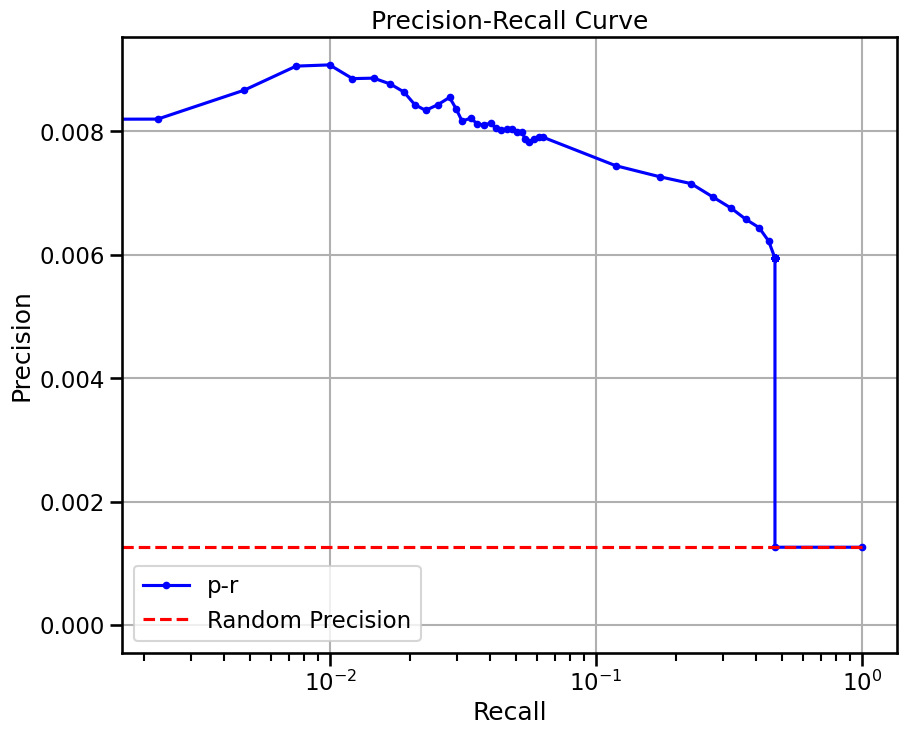

base enrichment


Top central genes: []
The DataFrame contains only the same values.


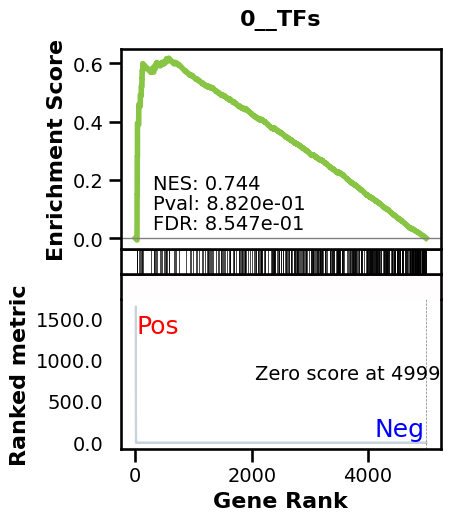

_________________________________________
TF specific enrichment


found some significant results for  6.25 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3518 genes
intersection pct: 0.7036
precision:  0.0012585320164533508 
recall:  1.0 
random precision: 0.001258889858937415


  0%|          | 0/128 [00:00<?, ?it/s]

  5%|▍         | 6/128 [00:00<00:02, 55.65it/s]

  9%|▉         | 12/128 [00:00<00:02, 55.35it/s]

 14%|█▍        | 18/128 [00:00<00:01, 55.28it/s]

 19%|█▉        | 24/128 [00:00<00:01, 55.27it/s]

 23%|██▎       | 30/128 [00:00<00:01, 55.27it/s]

 28%|██▊       | 36/128 [00:00<00:01, 55.40it/s]

 33%|███▎      | 42/128 [00:00<00:01, 55.70it/s]

 38%|███▊      | 48/128 [00:00<00:01, 55.92it/s]

 42%|████▏     | 54/128 [00:00<00:01, 55.98it/s]

 47%|████▋     | 60/128 [00:01<00:01, 56.00it/s]

 52%|█████▏    | 66/128 [00:01<00:01, 56.20it/s]

 56%|█████▋    | 72/128 [00:01<00:00, 56.22it/s]

 61%|██████    | 78/128 [00:01<00:00, 55.88it/s]

 66%|██████▌   | 84/128 [00:01<00:00, 55.63it/s]

 70%|███████   | 90/128 [00:01<00:00, 55.45it/s]

 75%|███████▌  | 96/128 [00:01<00:00, 55.31it/s]

 80%|███████▉  | 102/128 [00:01<00:00, 55.23it/s]

 84%|████████▍ | 108/128 [00:01<00:00, 55.20it/s]

 89%|████████▉ | 114/128 [00:02<00:00, 55.59it/s]

 94%|█████████▍| 120/128 [00:02<00:00, 55.45it/s]

 98%|█████████▊| 126/128 [00:02<00:00, 55.33it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:756: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:02<00:00, 55.53it/s]

Area Under Precision-Recall Curve (AUPRC):  0.0018894702469398335
EPR: 1.7371594010847209


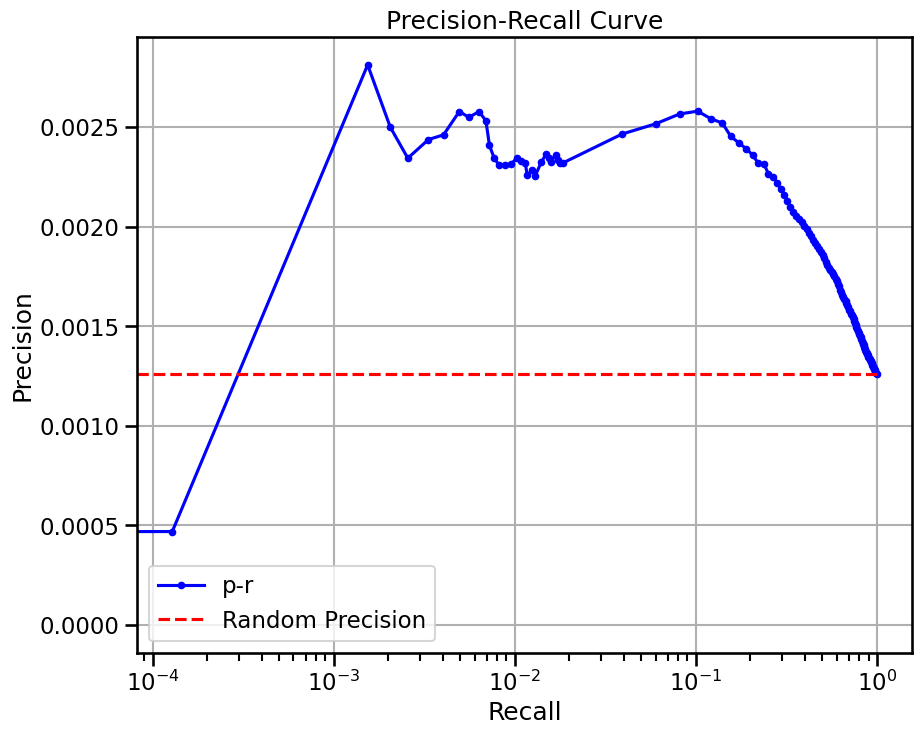

base enrichment


Top central genes: []


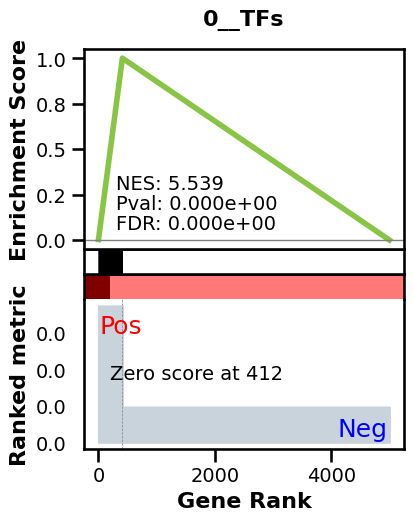

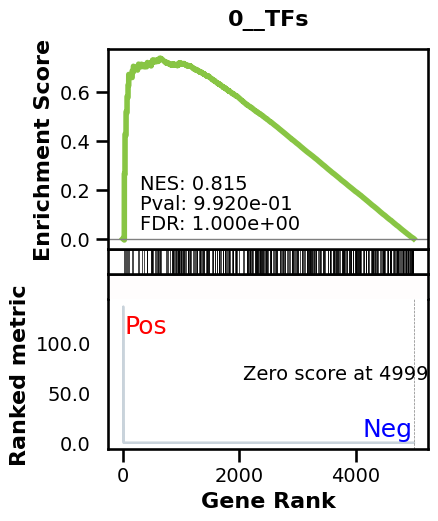

_________________________________________
TF specific enrichment


found some significant results for  4.6875 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3518 genes
intersection pct: 0.7036
precision:  0.005945748396004223 
recall:  0.4700179763739086 
random precision: 0.001258889858937415


  0%|          | 0/128 [00:00<?, ?it/s]

  5%|▍         | 6/128 [00:00<00:02, 56.05it/s]

  9%|▉         | 12/128 [00:00<00:02, 56.09it/s]

 14%|█▍        | 18/128 [00:00<00:01, 56.08it/s]

 19%|█▉        | 24/128 [00:00<00:01, 56.08it/s]

 23%|██▎       | 30/128 [00:00<00:01, 55.90it/s]

 28%|██▊       | 36/128 [00:00<00:01, 55.95it/s]

 33%|███▎      | 42/128 [00:00<00:01, 55.98it/s]

 38%|███▊      | 48/128 [00:00<00:01, 56.05it/s]

 42%|████▏     | 54/128 [00:00<00:01, 56.08it/s]

 47%|████▋     | 60/128 [00:01<00:01, 56.12it/s]

 52%|█████▏    | 66/128 [00:01<00:01, 56.09it/s]

 56%|█████▋    | 72/128 [00:01<00:00, 56.05it/s]

 61%|██████    | 78/128 [00:01<00:00, 56.07it/s]

 66%|██████▌   | 84/128 [00:01<00:00, 56.00it/s]

 70%|███████   | 90/128 [00:01<00:00, 56.00it/s]

 75%|███████▌  | 96/128 [00:01<00:00, 56.07it/s]

 80%|███████▉  | 102/128 [00:01<00:00, 56.03it/s]

 84%|████████▍ | 108/128 [00:01<00:00, 55.72it/s]

 89%|████████▉ | 114/128 [00:02<00:00, 55.99it/s]

 94%|█████████▍| 120/128 [00:02<00:00, 55.96it/s]

 98%|█████████▊| 126/128 [00:02<00:00, 55.97it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:756: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:02<00:00, 55.97it/s]

Area Under Precision-Recall Curve (AUPRC):  0.005570801241444172
EPR: 12.3237295387727


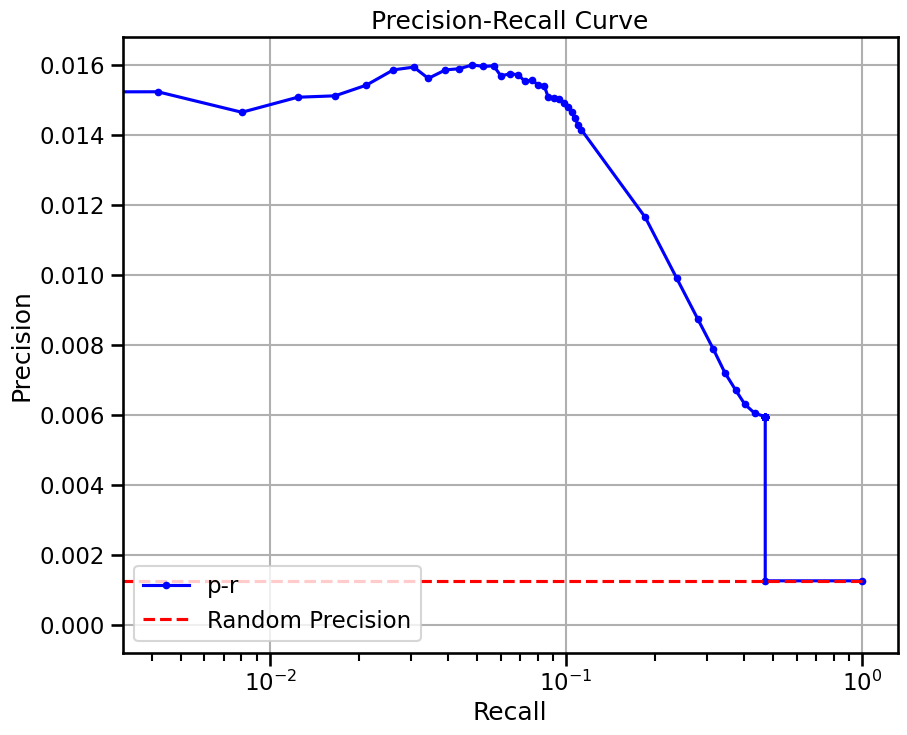

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:02<00:29,  2.25s/it]

 14%|█▍        | 2/14 [00:03<00:19,  1.66s/it]

 21%|██▏       | 3/14 [00:04<00:16,  1.47s/it]

 29%|██▊       | 4/14 [00:05<00:13,  1.39s/it]

 36%|███▌      | 5/14 [00:07<00:12,  1.33s/it]

 43%|████▎     | 6/14 [00:08<00:10,  1.31s/it]

 50%|█████     | 7/14 [00:09<00:08,  1.28s/it]

 57%|█████▋    | 8/14 [00:10<00:07,  1.25s/it]

 64%|██████▍   | 9/14 [00:12<00:06,  1.23s/it]

 71%|███████▏  | 10/14 [00:13<00:04,  1.21s/it]

 79%|███████▊  | 11/14 [00:14<00:03,  1.19s/it]

 86%|████████▌ | 12/14 [00:15<00:02,  1.19s/it]

 93%|█████████▎| 13/14 [00:16<00:01,  1.18s/it]

100%|██████████| 14/14 [00:17<00:00,  1.07s/it]

100%|██████████| 14/14 [00:17<00:00,  1.27s/it]

base enrichment


Top central genes: []
The DataFrame contains only the same values.


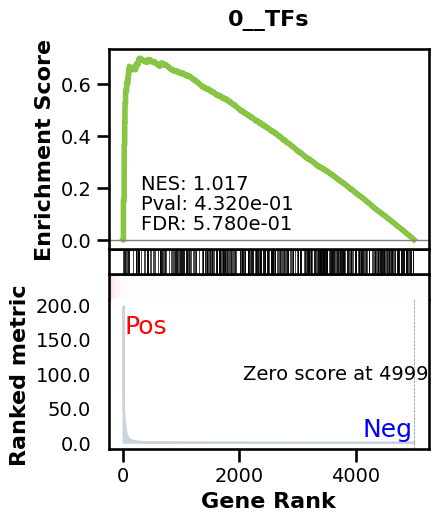

_________________________________________
TF specific enrichment


found some significant results for  29.09090909090909 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3538 genes
intersection pct: 0.7076
precision:  0.0015724456206874184 
recall:  1.0 
random precision: 0.0015728901911201826


  0%|          | 0/128 [00:00<?, ?it/s]

  5%|▍         | 6/128 [00:00<00:02, 53.96it/s]

  9%|▉         | 12/128 [00:00<00:02, 53.56it/s]

 14%|█▍        | 18/128 [00:00<00:02, 53.68it/s]

 19%|█▉        | 24/128 [00:00<00:01, 53.79it/s]

 23%|██▎       | 30/128 [00:00<00:01, 53.76it/s]

 28%|██▊       | 36/128 [00:00<00:01, 53.71it/s]

 33%|███▎      | 42/128 [00:00<00:01, 53.71it/s]

 38%|███▊      | 48/128 [00:00<00:01, 53.74it/s]

 42%|████▏     | 54/128 [00:01<00:01, 53.79it/s]

 47%|████▋     | 60/128 [00:01<00:01, 53.81it/s]

 52%|█████▏    | 66/128 [00:01<00:01, 53.77it/s]

 56%|█████▋    | 72/128 [00:01<00:01, 53.77it/s]

 61%|██████    | 78/128 [00:01<00:00, 53.80it/s]

 66%|██████▌   | 84/128 [00:01<00:00, 53.78it/s]

 70%|███████   | 90/128 [00:01<00:00, 53.27it/s]

 75%|███████▌  | 96/128 [00:01<00:00, 53.41it/s]

 80%|███████▉  | 102/128 [00:01<00:00, 53.56it/s]

 84%|████████▍ | 108/128 [00:02<00:00, 53.67it/s]

 89%|████████▉ | 114/128 [00:02<00:00, 53.68it/s]

 94%|█████████▍| 120/128 [00:02<00:00, 53.72it/s]

 98%|█████████▊| 126/128 [00:02<00:00, 53.64it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:756: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:02<00:00, 53.65it/s]

Area Under Precision-Recall Curve (AUPRC):  0.0017366945755021444
EPR: 1.618165553046366


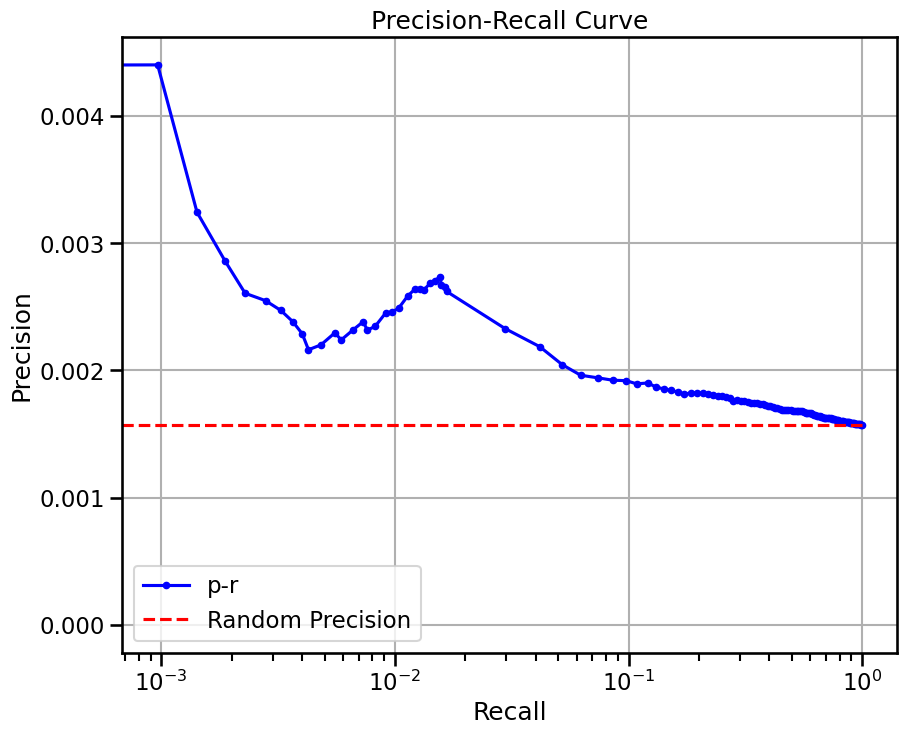

base enrichment


Top central genes: []


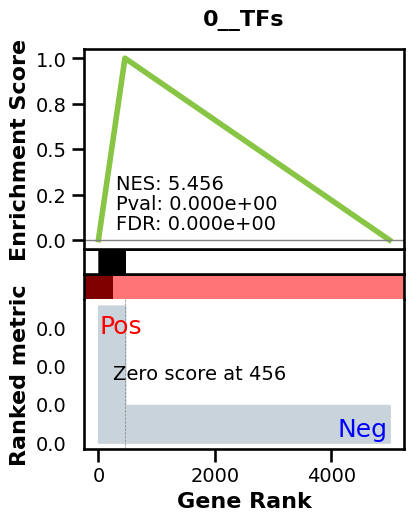

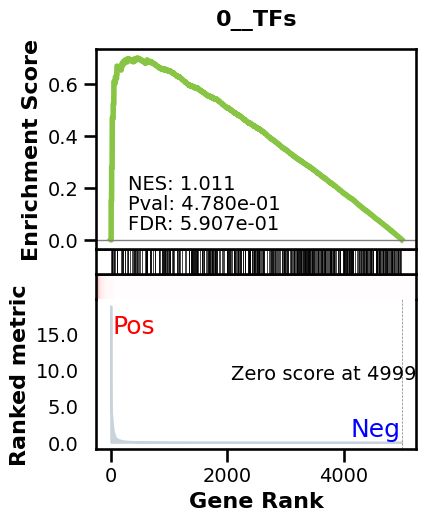

_________________________________________
TF specific enrichment


found some significant results for  9.090909090909092 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3538 genes
intersection pct: 0.7076
precision:  0.007216602122232253 
recall:  0.5214652237971854 
random precision: 0.0015728901911201826


  0%|          | 0/128 [00:00<?, ?it/s]

  5%|▍         | 6/128 [00:00<00:02, 54.02it/s]

  9%|▉         | 12/128 [00:00<00:02, 53.96it/s]

 14%|█▍        | 18/128 [00:00<00:02, 53.88it/s]

 19%|█▉        | 24/128 [00:00<00:01, 53.89it/s]

 23%|██▎       | 30/128 [00:00<00:01, 53.86it/s]

 28%|██▊       | 36/128 [00:00<00:01, 53.89it/s]

 33%|███▎      | 42/128 [00:00<00:01, 53.92it/s]

 38%|███▊      | 48/128 [00:00<00:01, 53.92it/s]

 42%|████▏     | 54/128 [00:01<00:01, 53.90it/s]

 47%|████▋     | 60/128 [00:01<00:01, 53.91it/s]

 52%|█████▏    | 66/128 [00:01<00:01, 53.93it/s]

 56%|█████▋    | 72/128 [00:01<00:01, 53.93it/s]

 61%|██████    | 78/128 [00:01<00:00, 53.95it/s]

 66%|██████▌   | 84/128 [00:01<00:00, 53.94it/s]

 70%|███████   | 90/128 [00:01<00:00, 53.91it/s]

 75%|███████▌  | 96/128 [00:01<00:00, 53.88it/s]

 80%|███████▉  | 102/128 [00:01<00:00, 53.90it/s]

 84%|████████▍ | 108/128 [00:02<00:00, 53.91it/s]

 89%|████████▉ | 114/128 [00:02<00:00, 53.92it/s]

 94%|█████████▍| 120/128 [00:02<00:00, 53.92it/s]

 98%|█████████▊| 126/128 [00:02<00:00, 53.91it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:756: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:02<00:00, 53.89it/s]

Area Under Precision-Recall Curve (AUPRC):  0.005075547763076904
EPR: 7.582059873710058


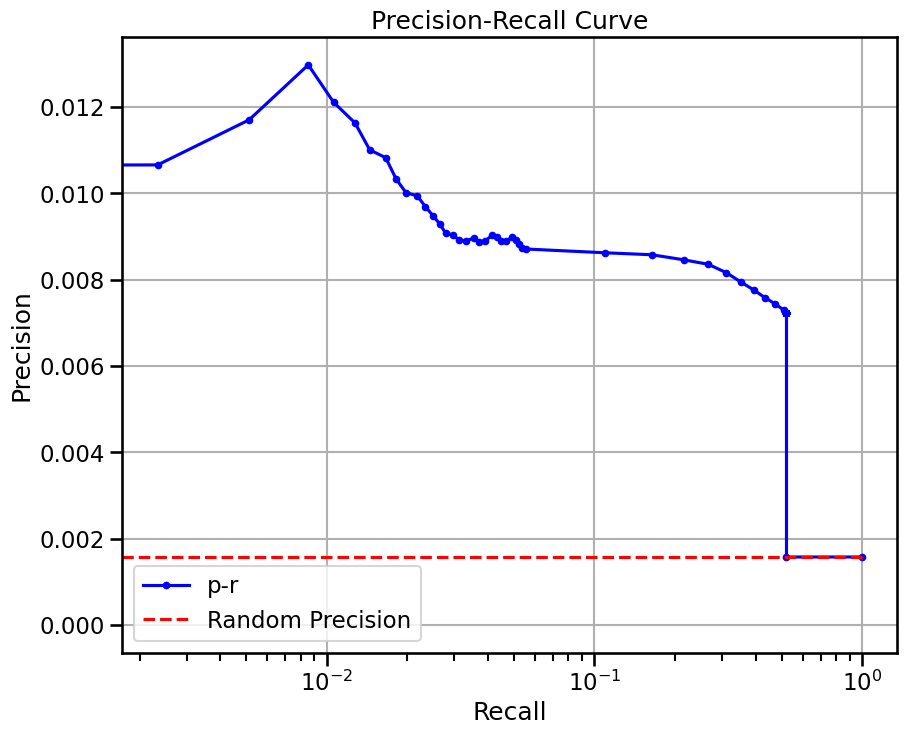

base enrichment


Top central genes: []
The DataFrame contains only the same values.


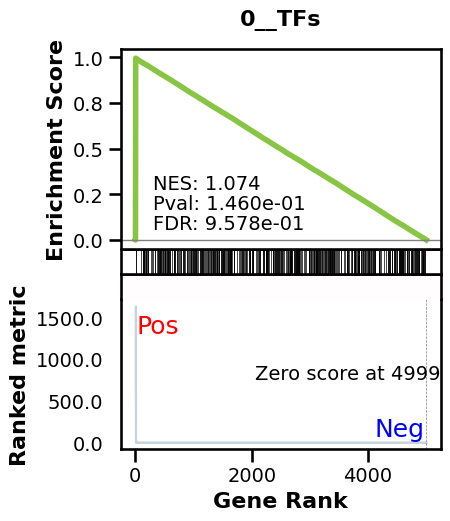

_________________________________________
TF specific enrichment


found some significant results for  12.727272727272727 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3538 genes
intersection pct: 0.7076
precision:  0.0015724456206874184 
recall:  1.0 
random precision: 0.0015728901911201826


  0%|          | 0/128 [00:00<?, ?it/s]

  5%|▍         | 6/128 [00:00<00:02, 54.27it/s]

  9%|▉         | 12/128 [00:00<00:02, 54.32it/s]

 14%|█▍        | 18/128 [00:00<00:02, 54.29it/s]

 19%|█▉        | 24/128 [00:00<00:01, 54.33it/s]

 23%|██▎       | 30/128 [00:00<00:01, 54.27it/s]

 28%|██▊       | 36/128 [00:00<00:01, 54.32it/s]

 33%|███▎      | 42/128 [00:00<00:01, 53.49it/s]

 38%|███▊      | 48/128 [00:00<00:01, 53.10it/s]

 42%|████▏     | 54/128 [00:01<00:01, 52.92it/s]

 47%|████▋     | 60/128 [00:01<00:01, 52.74it/s]

 52%|█████▏    | 66/128 [00:01<00:01, 52.63it/s]

 56%|█████▋    | 72/128 [00:01<00:01, 52.57it/s]

 61%|██████    | 78/128 [00:01<00:00, 52.52it/s]

 66%|██████▌   | 84/128 [00:01<00:00, 52.52it/s]

 70%|███████   | 90/128 [00:01<00:00, 52.50it/s]

 75%|███████▌  | 96/128 [00:01<00:00, 52.47it/s]

 80%|███████▉  | 102/128 [00:01<00:00, 52.49it/s]

 84%|████████▍ | 108/128 [00:02<00:00, 52.51it/s]

 89%|████████▉ | 114/128 [00:02<00:00, 52.51it/s]

 94%|█████████▍| 120/128 [00:02<00:00, 52.53it/s]

 98%|█████████▊| 126/128 [00:02<00:00, 52.57it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:756: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:02<00:00, 52.92it/s]

Area Under Precision-Recall Curve (AUPRC):  0.0020322682605136678
EPR: 2.0089823089392


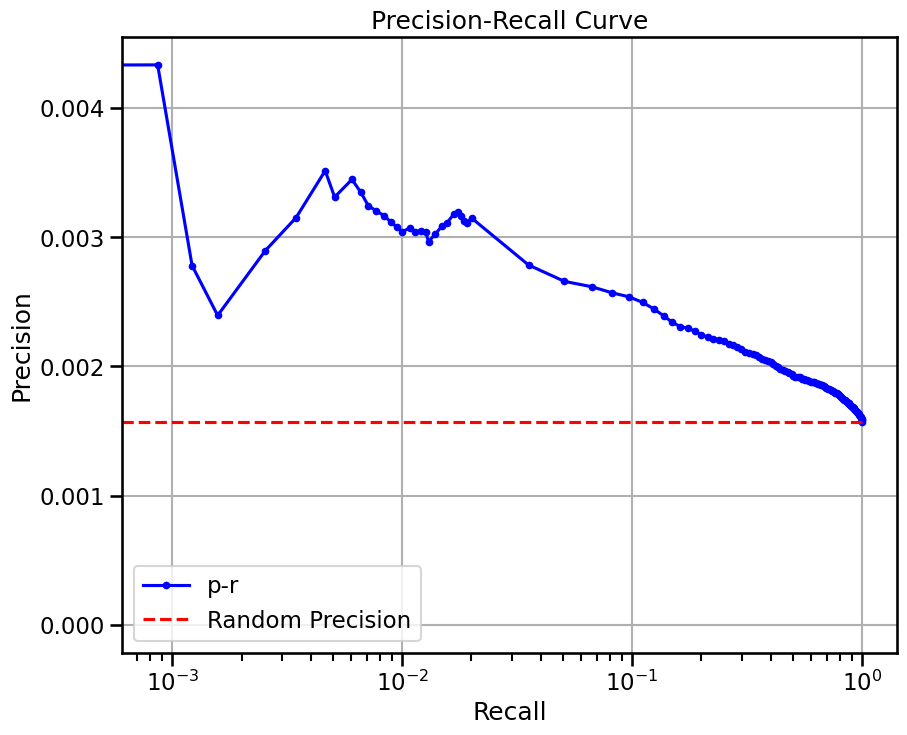

base enrichment


Top central genes: []


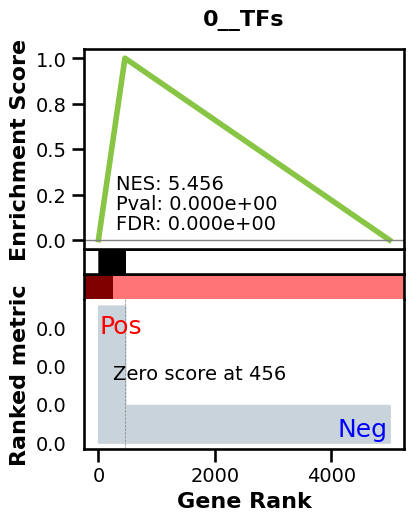

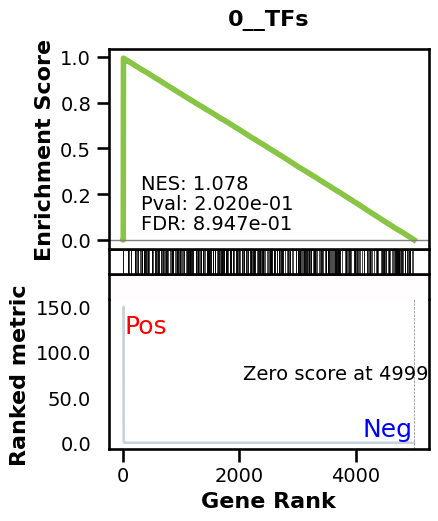

_________________________________________
TF specific enrichment


found some significant results for  7.2727272727272725 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3538 genes
intersection pct: 0.7076
precision:  0.007216602122232253 
recall:  0.5214652237971854 
random precision: 0.0015728901911201826


  0%|          | 0/128 [00:00<?, ?it/s]

  5%|▍         | 6/128 [00:00<00:02, 54.34it/s]

  9%|▉         | 12/128 [00:00<00:02, 54.22it/s]

 14%|█▍        | 18/128 [00:00<00:02, 54.10it/s]

 19%|█▉        | 24/128 [00:00<00:01, 54.14it/s]

 23%|██▎       | 30/128 [00:00<00:01, 54.22it/s]

 28%|██▊       | 36/128 [00:00<00:01, 54.19it/s]

 33%|███▎      | 42/128 [00:00<00:01, 54.07it/s]

 38%|███▊      | 48/128 [00:00<00:01, 54.11it/s]

 42%|████▏     | 54/128 [00:00<00:01, 54.16it/s]

 47%|████▋     | 60/128 [00:01<00:01, 54.17it/s]

 52%|█████▏    | 66/128 [00:01<00:01, 54.13it/s]

 56%|█████▋    | 72/128 [00:01<00:01, 54.16it/s]

 61%|██████    | 78/128 [00:01<00:00, 54.21it/s]

 66%|██████▌   | 84/128 [00:01<00:00, 54.21it/s]

 70%|███████   | 90/128 [00:01<00:00, 54.20it/s]

 75%|███████▌  | 96/128 [00:01<00:00, 53.94it/s]

 80%|███████▉  | 102/128 [00:01<00:00, 54.06it/s]

 84%|████████▍ | 108/128 [00:01<00:00, 54.12it/s]

 89%|████████▉ | 114/128 [00:02<00:00, 54.17it/s]

 94%|█████████▍| 120/128 [00:02<00:00, 53.76it/s]

 98%|█████████▊| 126/128 [00:02<00:00, 53.89it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:756: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:02<00:00, 54.06it/s]

Area Under Precision-Recall Curve (AUPRC):  0.0057325993872280115
EPR: 9.073572668362264


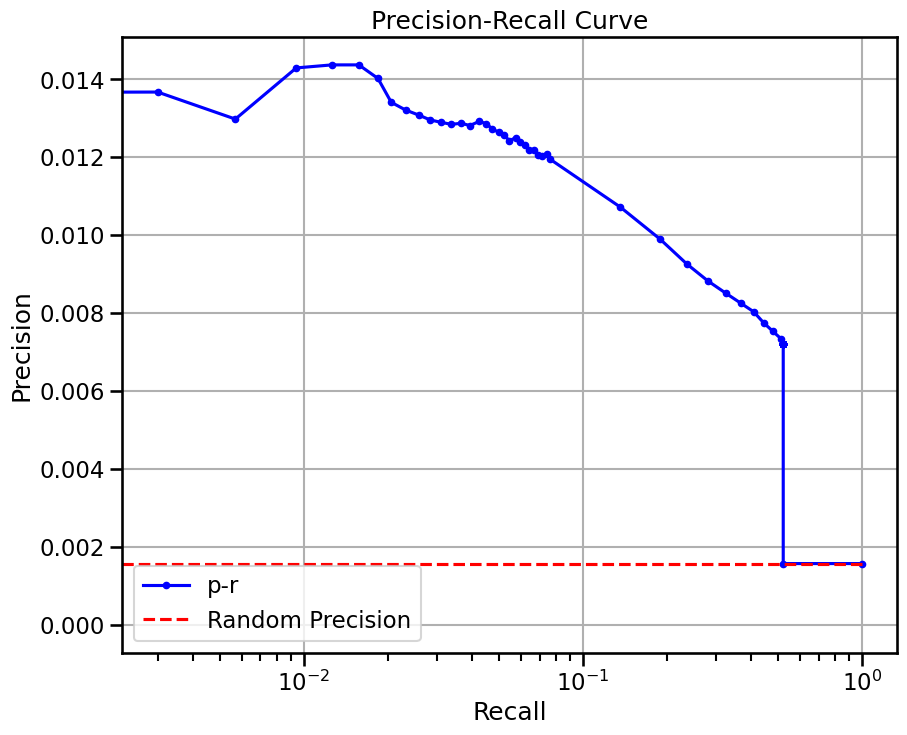

  0%|          | 0/22 [00:00<?, ?it/s]

  5%|▍         | 1/22 [00:02<00:49,  2.35s/it]

  9%|▉         | 2/22 [00:03<00:35,  1.77s/it]

 14%|█▎        | 3/22 [00:05<00:30,  1.59s/it]

 18%|█▊        | 4/22 [00:06<00:27,  1.50s/it]

 23%|██▎       | 5/22 [00:07<00:24,  1.45s/it]

 27%|██▋       | 6/22 [00:09<00:22,  1.41s/it]

 32%|███▏      | 7/22 [00:10<00:23,  1.54s/it]

 36%|███▋      | 8/22 [00:12<00:20,  1.47s/it]

 41%|████      | 9/22 [00:13<00:18,  1.41s/it]

 45%|████▌     | 10/22 [00:14<00:16,  1.38s/it]

 50%|█████     | 11/22 [00:16<00:14,  1.35s/it]

 55%|█████▍    | 12/22 [00:17<00:13,  1.33s/it]

 59%|█████▉    | 13/22 [00:18<00:11,  1.32s/it]

 64%|██████▎   | 14/22 [00:20<00:10,  1.31s/it]

 68%|██████▊   | 15/22 [00:21<00:09,  1.31s/it]

 73%|███████▎  | 16/22 [00:22<00:07,  1.30s/it]

 77%|███████▋  | 17/22 [00:23<00:06,  1.30s/it]

 82%|████████▏ | 18/22 [00:25<00:05,  1.30s/it]

 86%|████████▋ | 19/22 [00:26<00:03,  1.30s/it]

 91%|█████████ | 20/22 [00:27<00:02,  1.30s/it]

 95%|█████████▌| 21/22 [00:29<00:01,  1.30s/it]

100%|██████████| 22/22 [00:30<00:00,  1.28s/it]

100%|██████████| 22/22 [00:30<00:00,  1.39s/it]

base enrichment


Top central genes: []
The DataFrame contains only the same values.


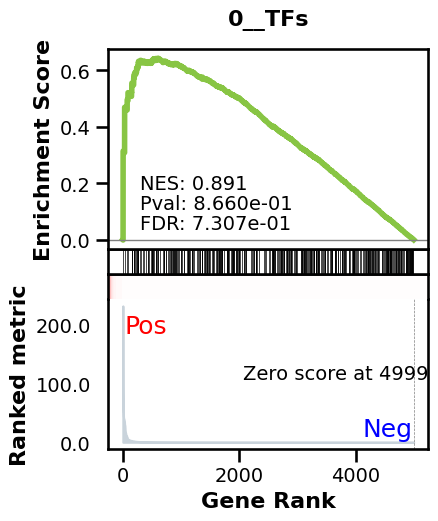

_________________________________________
TF specific enrichment


found some significant results for  22.916666666666668 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3511 genes
intersection pct: 0.7022
precision:  0.0014142799441978382 
recall:  1.0 
random precision: 0.001414682872956869


  0%|          | 0/128 [00:00<?, ?it/s]

  5%|▍         | 6/128 [00:00<00:02, 54.42it/s]

  9%|▉         | 12/128 [00:00<00:02, 56.16it/s]

 14%|█▍        | 18/128 [00:00<00:01, 56.69it/s]

 19%|█▉        | 24/128 [00:00<00:01, 55.75it/s]

 23%|██▎       | 30/128 [00:00<00:01, 56.36it/s]

 28%|██▊       | 36/128 [00:00<00:01, 56.76it/s]

 33%|███▎      | 42/128 [00:00<00:01, 56.99it/s]

 38%|███▊      | 48/128 [00:00<00:01, 57.16it/s]

 42%|████▏     | 54/128 [00:00<00:01, 57.27it/s]

 47%|████▋     | 60/128 [00:01<00:01, 57.22it/s]

 52%|█████▏    | 66/128 [00:01<00:01, 57.23it/s]

 56%|█████▋    | 72/128 [00:01<00:00, 57.19it/s]

 61%|██████    | 78/128 [00:01<00:00, 57.23it/s]

 66%|██████▌   | 84/128 [00:01<00:00, 57.27it/s]

 70%|███████   | 90/128 [00:01<00:00, 57.21it/s]

 75%|███████▌  | 96/128 [00:01<00:00, 57.25it/s]

 80%|███████▉  | 102/128 [00:01<00:00, 57.26it/s]

 84%|████████▍ | 108/128 [00:01<00:00, 57.14it/s]

 89%|████████▉ | 114/128 [00:02<00:00, 57.15it/s]

 94%|█████████▍| 120/128 [00:02<00:00, 57.21it/s]

 98%|█████████▊| 126/128 [00:02<00:00, 57.30it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:756: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:02<00:00, 56.99it/s]

Area Under Precision-Recall Curve (AUPRC):  0.0015218296117236664
EPR: 1.1764091504742658


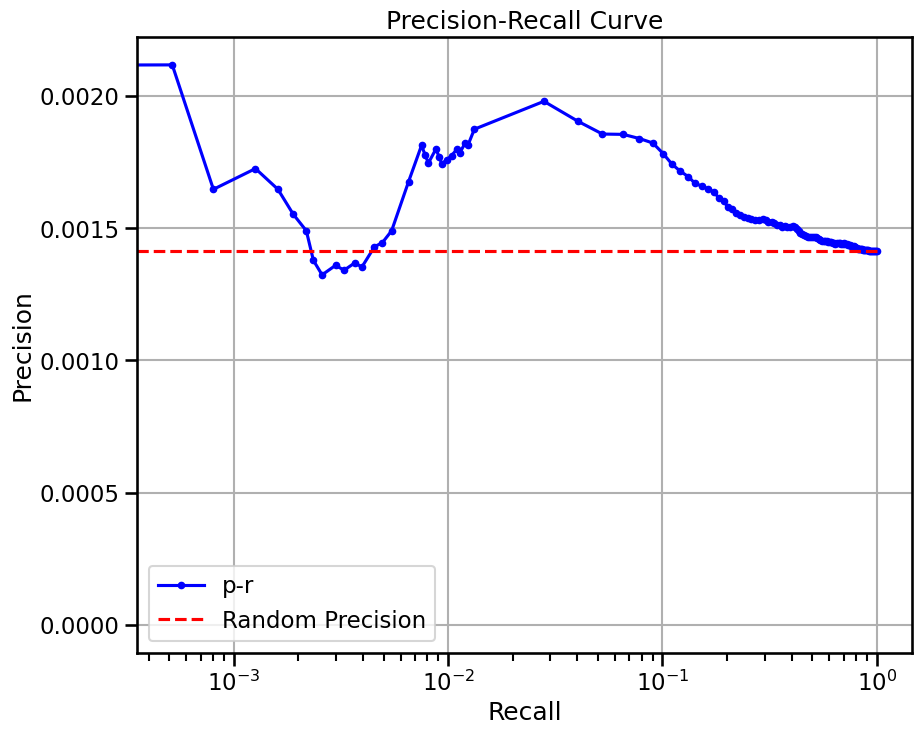

base enrichment


Top central genes: []


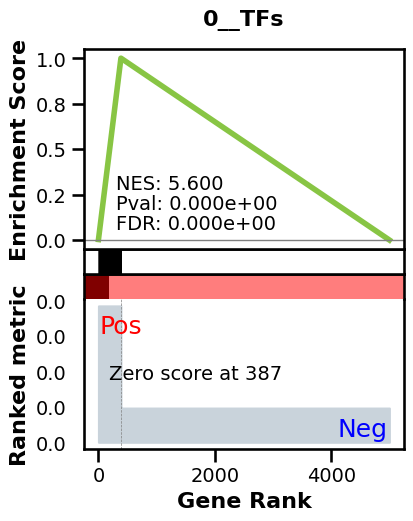

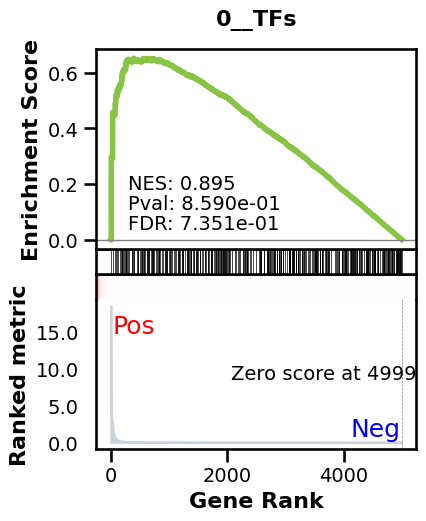

_________________________________________
TF specific enrichment


found some significant results for  4.166666666666667 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3511 genes
intersection pct: 0.7022
precision:  0.007612673505194292 
recall:  0.50745669381668 
random precision: 0.001414682872956869


  0%|          | 0/128 [00:00<?, ?it/s]

  5%|▍         | 6/128 [00:00<00:02, 54.57it/s]

  9%|▉         | 12/128 [00:00<00:02, 54.59it/s]

 14%|█▍        | 18/128 [00:00<00:02, 54.86it/s]

 19%|█▉        | 24/128 [00:00<00:01, 54.82it/s]

 23%|██▎       | 30/128 [00:00<00:01, 54.97it/s]

 28%|██▊       | 36/128 [00:00<00:01, 55.07it/s]

 33%|███▎      | 42/128 [00:00<00:01, 55.24it/s]

 38%|███▊      | 48/128 [00:00<00:01, 55.25it/s]

 42%|████▏     | 54/128 [00:00<00:01, 55.23it/s]

 47%|████▋     | 60/128 [00:01<00:01, 55.26it/s]

 52%|█████▏    | 66/128 [00:01<00:01, 55.29it/s]

 56%|█████▋    | 72/128 [00:01<00:01, 55.26it/s]

 61%|██████    | 78/128 [00:01<00:00, 55.35it/s]

 66%|██████▌   | 84/128 [00:01<00:00, 55.46it/s]

 70%|███████   | 90/128 [00:01<00:00, 55.49it/s]

 75%|███████▌  | 96/128 [00:01<00:00, 55.49it/s]

 80%|███████▉  | 102/128 [00:01<00:00, 55.46it/s]

 84%|████████▍ | 108/128 [00:01<00:00, 55.46it/s]

 89%|████████▉ | 114/128 [00:02<00:00, 55.35it/s]

 94%|█████████▍| 120/128 [00:02<00:00, 55.37it/s]

 98%|█████████▊| 126/128 [00:02<00:00, 55.35it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:756: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:02<00:00, 55.22it/s]

Area Under Precision-Recall Curve (AUPRC):  0.005065120164429199
EPR: 9.123769079747344


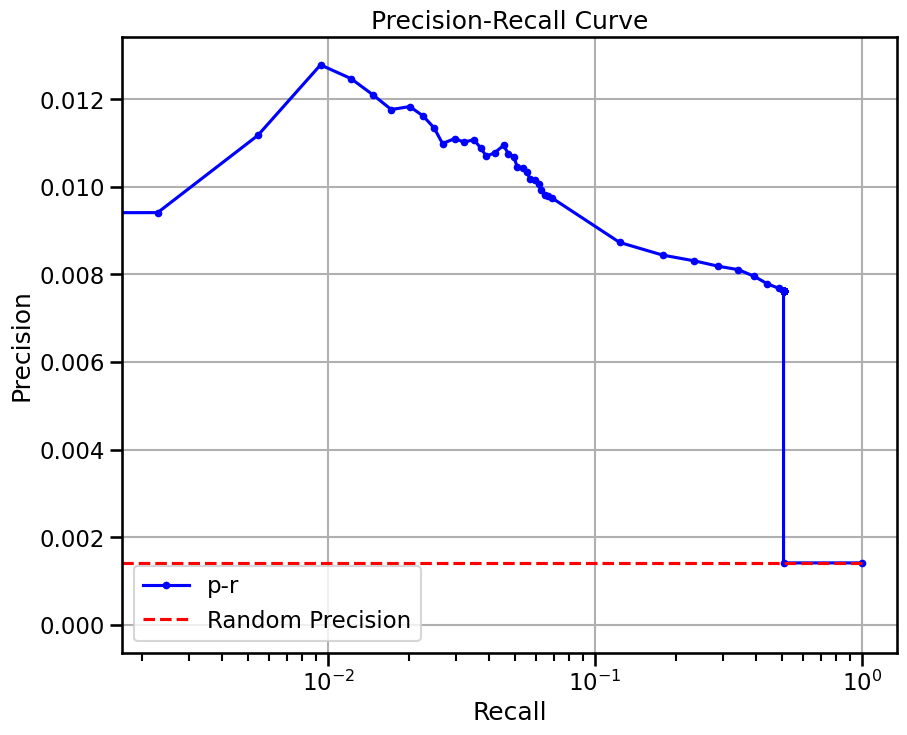

base enrichment


Top central genes: []
The DataFrame contains only the same values.


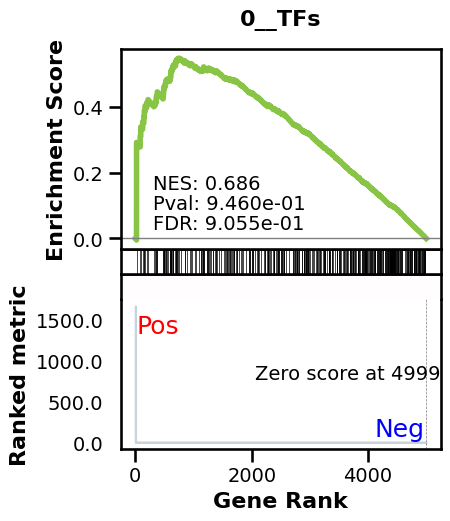

_________________________________________
TF specific enrichment


found some significant results for  8.333333333333334 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3511 genes
intersection pct: 0.7022
precision:  0.0014142799441978382 
recall:  1.0 
random precision: 0.001414682872956869


  0%|          | 0/128 [00:00<?, ?it/s]

  5%|▍         | 6/128 [00:00<00:02, 56.37it/s]

  9%|▉         | 12/128 [00:00<00:02, 56.40it/s]

 14%|█▍        | 18/128 [00:00<00:01, 56.41it/s]

 19%|█▉        | 24/128 [00:00<00:01, 56.36it/s]

 23%|██▎       | 30/128 [00:00<00:01, 55.99it/s]

 28%|██▊       | 36/128 [00:00<00:01, 56.02it/s]

 33%|███▎      | 42/128 [00:00<00:01, 56.06it/s]

 38%|███▊      | 48/128 [00:00<00:01, 56.24it/s]

 42%|████▏     | 54/128 [00:00<00:01, 56.21it/s]

 47%|████▋     | 60/128 [00:01<00:01, 56.25it/s]

 52%|█████▏    | 66/128 [00:01<00:01, 56.25it/s]

 56%|█████▋    | 72/128 [00:01<00:00, 56.22it/s]

 61%|██████    | 78/128 [00:01<00:00, 56.16it/s]

 66%|██████▌   | 84/128 [00:01<00:00, 56.06it/s]

 70%|███████   | 90/128 [00:01<00:00, 55.72it/s]

 75%|███████▌  | 96/128 [00:01<00:00, 55.82it/s]

 80%|███████▉  | 102/128 [00:01<00:00, 55.83it/s]

 84%|████████▍ | 108/128 [00:01<00:00, 55.84it/s]

 89%|████████▉ | 114/128 [00:02<00:00, 55.81it/s]

 94%|█████████▍| 120/128 [00:02<00:00, 55.99it/s]

 98%|█████████▊| 126/128 [00:02<00:00, 56.04it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:756: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:02<00:00, 56.05it/s]

Area Under Precision-Recall Curve (AUPRC):  0.0018685267642366654
EPR: 1.7471423519160048


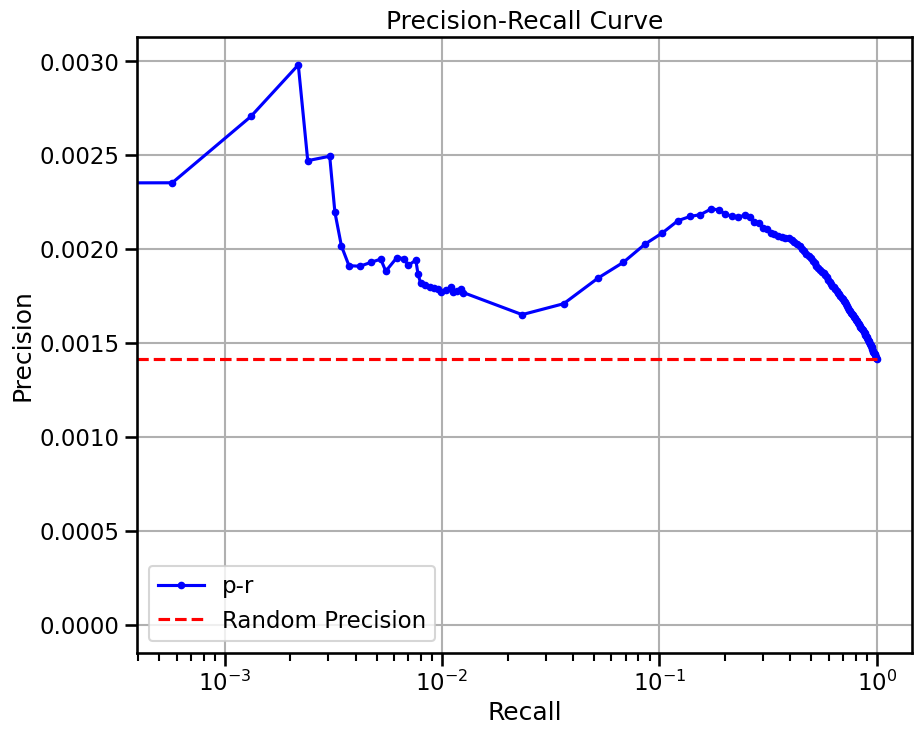

base enrichment


Top central genes: []


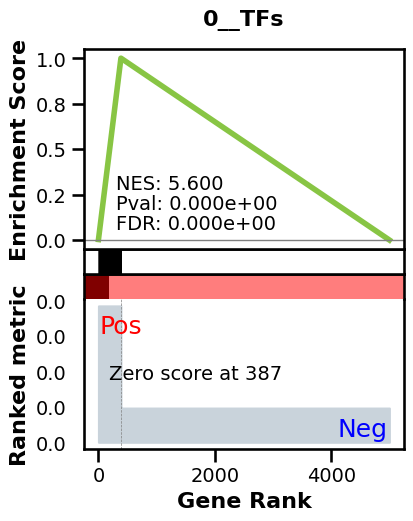

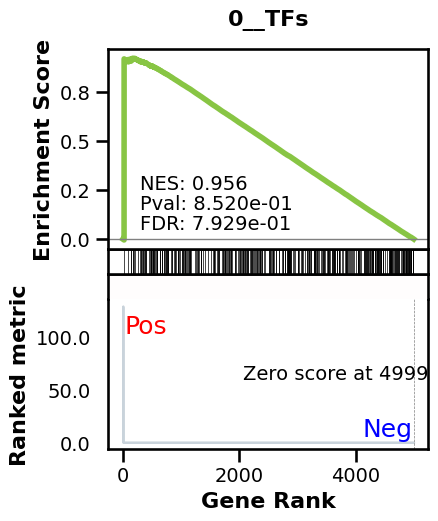

_________________________________________
TF specific enrichment


found some significant results for  2.0833333333333335 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3511 genes
intersection pct: 0.7022
precision:  0.007612673505194292 
recall:  0.50745669381668 
random precision: 0.001414682872956869


  0%|          | 0/128 [00:00<?, ?it/s]

  5%|▍         | 6/128 [00:00<00:02, 56.17it/s]

  9%|▉         | 12/128 [00:00<00:02, 56.25it/s]

 14%|█▍        | 18/128 [00:00<00:01, 56.20it/s]

 19%|█▉        | 24/128 [00:00<00:01, 55.92it/s]

 23%|██▎       | 30/128 [00:00<00:01, 56.02it/s]

 28%|██▊       | 36/128 [00:00<00:01, 56.08it/s]

 33%|███▎      | 42/128 [00:00<00:01, 55.73it/s]

 38%|███▊      | 48/128 [00:00<00:01, 55.56it/s]

 42%|████▏     | 54/128 [00:00<00:01, 55.48it/s]

 47%|████▋     | 60/128 [00:01<00:01, 55.35it/s]

 52%|█████▏    | 66/128 [00:01<00:01, 55.47it/s]

 56%|█████▋    | 72/128 [00:01<00:01, 55.66it/s]

 61%|██████    | 78/128 [00:01<00:00, 55.57it/s]

 66%|██████▌   | 84/128 [00:01<00:00, 55.89it/s]

 70%|███████   | 90/128 [00:01<00:00, 55.52it/s]

 75%|███████▌  | 96/128 [00:01<00:00, 55.31it/s]

 80%|███████▉  | 102/128 [00:01<00:00, 55.24it/s]

 84%|████████▍ | 108/128 [00:01<00:00, 55.16it/s]

 89%|████████▉ | 114/128 [00:02<00:00, 54.95it/s]

 94%|█████████▍| 120/128 [00:02<00:00, 55.34it/s]

 98%|█████████▊| 126/128 [00:02<00:00, 55.65it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:756: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:02<00:00, 55.56it/s]

Area Under Precision-Recall Curve (AUPRC):  0.007250794327415903
EPR: 16.012405615818103


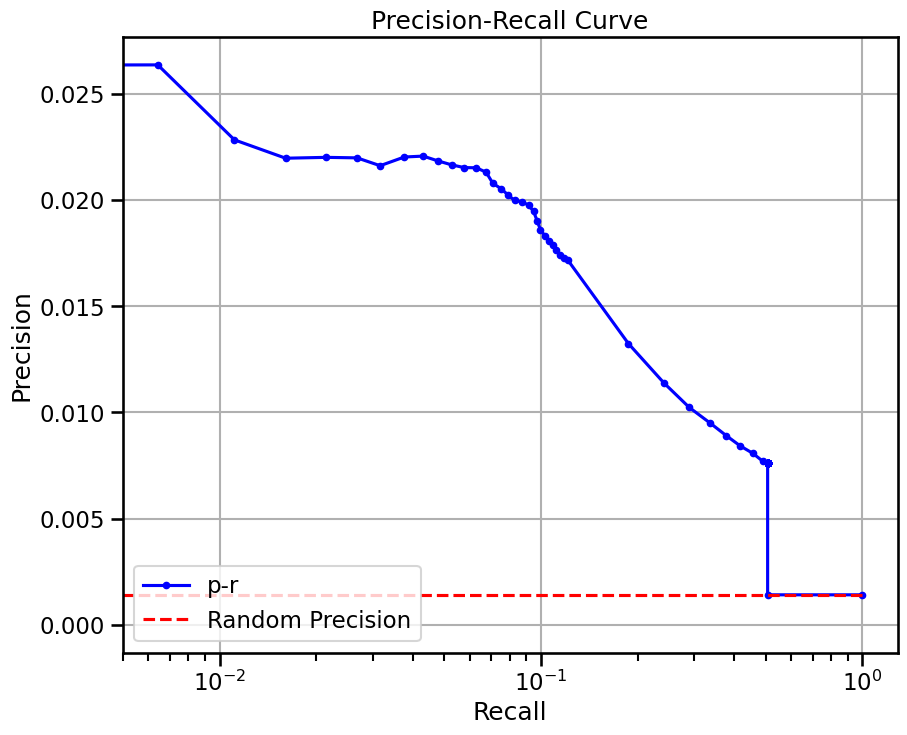

  0%|          | 0/12 [00:00<?, ?it/s]

  8%|▊         | 1/12 [00:03<00:41,  3.75s/it]

 17%|█▋        | 2/12 [00:05<00:23,  2.31s/it]

 25%|██▌       | 3/12 [00:06<00:16,  1.85s/it]

 33%|███▎      | 4/12 [00:07<00:12,  1.62s/it]

 42%|████▏     | 5/12 [00:08<00:10,  1.46s/it]

 50%|█████     | 6/12 [00:09<00:08,  1.37s/it]

 58%|█████▊    | 7/12 [00:11<00:06,  1.30s/it]

 67%|██████▋   | 8/12 [00:12<00:05,  1.27s/it]

 75%|███████▌  | 9/12 [00:13<00:03,  1.23s/it]

 83%|████████▎ | 10/12 [00:14<00:02,  1.19s/it]

 92%|█████████▏| 11/12 [00:15<00:01,  1.17s/it]

100%|██████████| 12/12 [00:16<00:00,  1.00it/s]

100%|██████████| 12/12 [00:16<00:00,  1.38s/it]

base enrichment


Top central genes: []
The DataFrame contains only the same values.


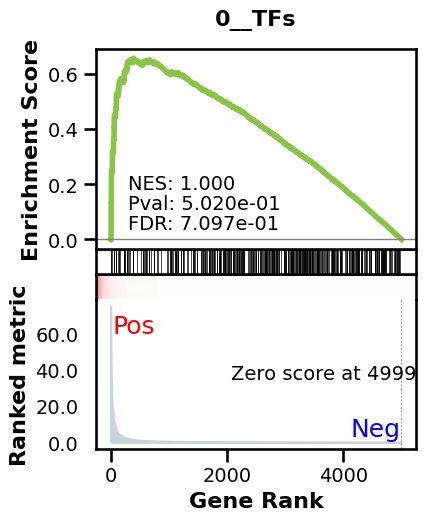

_________________________________________
TF specific enrichment


found some significant results for  16.666666666666668 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3169 genes
intersection pct: 0.6338
precision:  0.00138142053605649 
recall:  1.0 
random precision: 0.001381856590518629


  0%|          | 0/128 [00:00<?, ?it/s]

  5%|▌         | 7/128 [00:00<00:01, 69.79it/s]

 12%|█▏        | 15/128 [00:00<00:01, 70.77it/s]

 18%|█▊        | 23/128 [00:00<00:01, 70.65it/s]

 24%|██▍       | 31/128 [00:00<00:01, 70.37it/s]

 30%|███       | 39/128 [00:00<00:01, 70.75it/s]

 37%|███▋      | 47/128 [00:00<00:01, 70.68it/s]

 43%|████▎     | 55/128 [00:00<00:01, 70.17it/s]

 49%|████▉     | 63/128 [00:00<00:00, 69.96it/s]

 55%|█████▍    | 70/128 [00:00<00:00, 69.82it/s]

 60%|██████    | 77/128 [00:01<00:00, 69.73it/s]

 66%|██████▌   | 84/128 [00:01<00:00, 69.41it/s]

 71%|███████   | 91/128 [00:01<00:00, 69.40it/s]

 77%|███████▋  | 98/128 [00:01<00:00, 69.47it/s]

 83%|████████▎ | 106/128 [00:01<00:00, 69.72it/s]

 89%|████████▉ | 114/128 [00:01<00:00, 70.13it/s]

 95%|█████████▌| 122/128 [00:01<00:00, 69.88it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:756: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()


100%|██████████| 128/128 [00:01<00:00, 69.93it/s]

Area Under Precision-Recall Curve (AUPRC):  0.0017303115061190403
EPR: 1.043394828548237


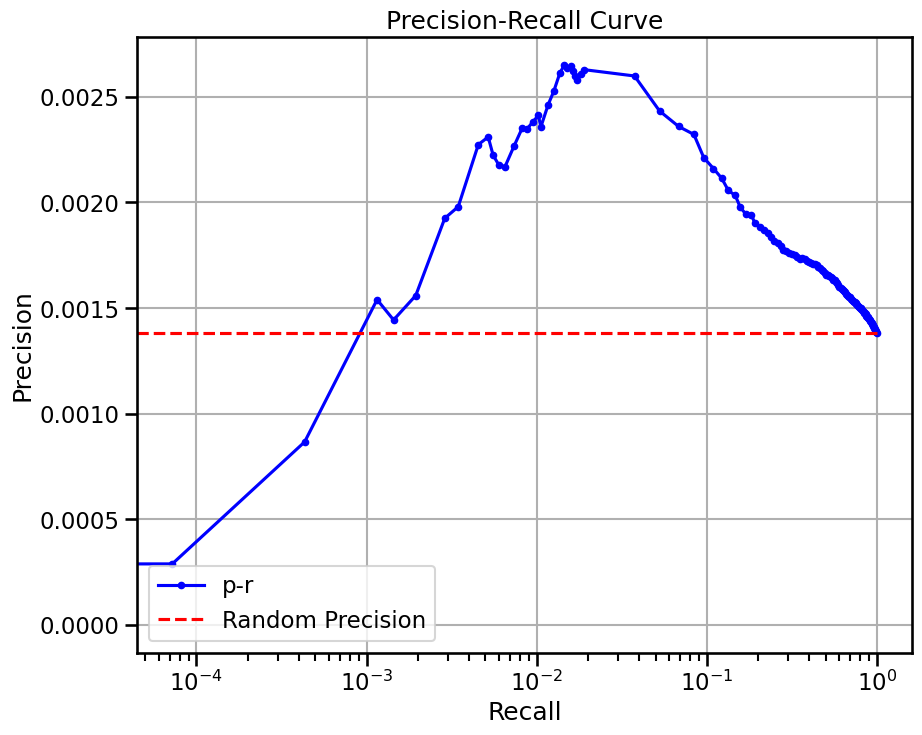

base enrichment


Top central genes: []


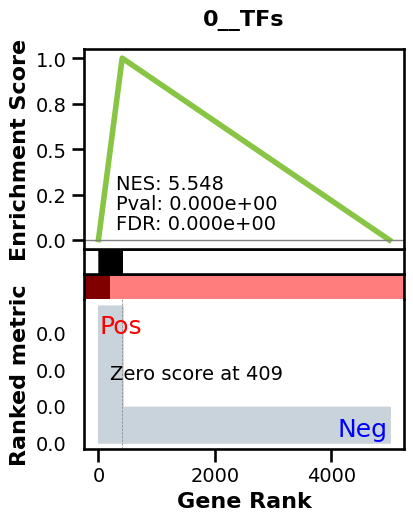

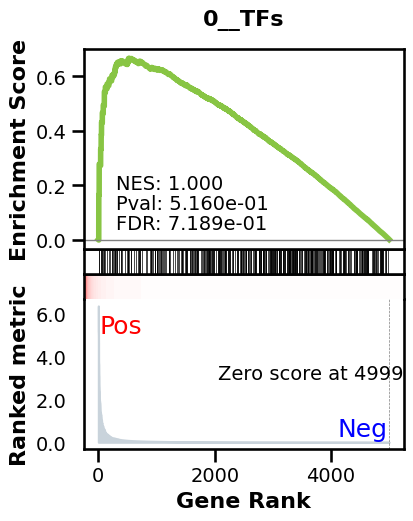

_________________________________________
TF specific enrichment


found some significant results for  1.8518518518518519 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3169 genes
intersection pct: 0.6338
precision:  0.006449082630843438 
recall:  0.5156058530959418 
random precision: 0.001381856590518629


  0%|          | 0/128 [00:00<?, ?it/s]

  5%|▌         | 7/128 [00:00<00:01, 68.90it/s]

 11%|█         | 14/128 [00:00<00:01, 68.68it/s]

 16%|█▋        | 21/128 [00:00<00:01, 69.07it/s]

 23%|██▎       | 29/128 [00:00<00:01, 69.87it/s]

 28%|██▊       | 36/128 [00:00<00:01, 69.83it/s]

 34%|███▎      | 43/128 [00:00<00:01, 69.67it/s]

 39%|███▉      | 50/128 [00:00<00:01, 69.49it/s]

 45%|████▍     | 57/128 [00:00<00:01, 69.41it/s]

 50%|█████     | 64/128 [00:00<00:00, 69.38it/s]

 55%|█████▌    | 71/128 [00:01<00:00, 69.37it/s]

 61%|██████    | 78/128 [00:01<00:00, 69.35it/s]

 66%|██████▋   | 85/128 [00:01<00:00, 69.34it/s]

 73%|███████▎  | 93/128 [00:01<00:00, 69.87it/s]

 79%|███████▉  | 101/128 [00:01<00:00, 70.27it/s]

 85%|████████▌ | 109/128 [00:01<00:00, 70.44it/s]

 91%|█████████▏| 117/128 [00:01<00:00, 70.59it/s]

 98%|█████████▊| 125/128 [00:01<00:00, 70.78it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:756: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:01<00:00, 69.89it/s]

Area Under Precision-Recall Curve (AUPRC):  0.005010240007293305
EPR: 9.228220400660664


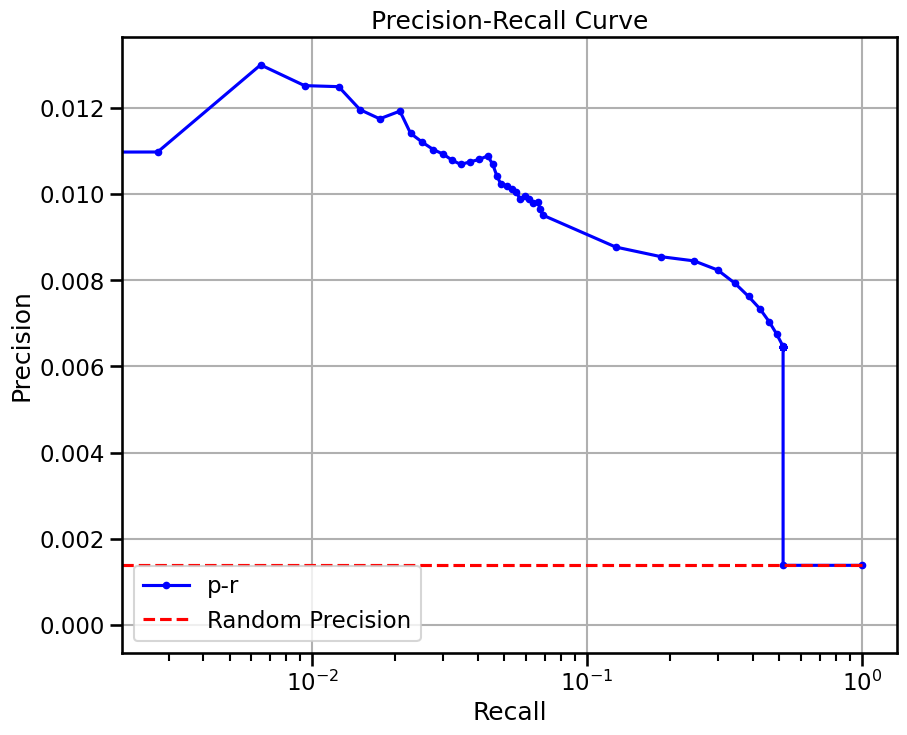

base enrichment


Top central genes: []
The DataFrame contains only the same values.


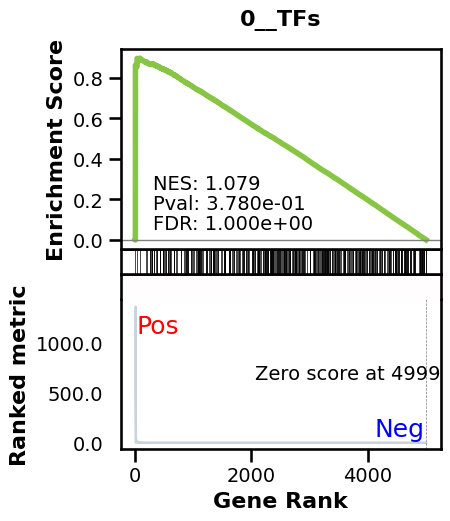

_________________________________________
TF specific enrichment


found some significant results for  7.407407407407407 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3169 genes
intersection pct: 0.6338
precision:  0.00138142053605649 
recall:  1.0 
random precision: 0.001381856590518629


  0%|          | 0/128 [00:00<?, ?it/s]

  5%|▌         | 7/128 [00:00<00:01, 68.40it/s]

 11%|█         | 14/128 [00:00<00:01, 68.47it/s]

 16%|█▋        | 21/128 [00:00<00:01, 68.45it/s]

 22%|██▏       | 28/128 [00:00<00:01, 68.52it/s]

 27%|██▋       | 35/128 [00:00<00:01, 68.58it/s]

 33%|███▎      | 42/128 [00:00<00:01, 68.88it/s]

 38%|███▊      | 49/128 [00:00<00:01, 69.02it/s]

 44%|████▍     | 56/128 [00:00<00:01, 67.71it/s]

 49%|████▉     | 63/128 [00:00<00:00, 67.95it/s]

 55%|█████▍    | 70/128 [00:01<00:00, 68.09it/s]

 60%|██████    | 77/128 [00:01<00:00, 68.22it/s]

 66%|██████▌   | 84/128 [00:01<00:00, 68.23it/s]

 71%|███████   | 91/128 [00:01<00:00, 68.61it/s]

 77%|███████▋  | 98/128 [00:01<00:00, 68.68it/s]

 82%|████████▏ | 105/128 [00:01<00:00, 68.80it/s]

 88%|████████▊ | 112/128 [00:01<00:00, 68.68it/s]

 93%|█████████▎| 119/128 [00:01<00:00, 68.67it/s]

 98%|█████████▊| 126/128 [00:01<00:00, 68.66it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:756: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:01<00:00, 68.46it/s]

Area Under Precision-Recall Curve (AUPRC):  0.0014410123598918505
EPR: 2.989634965619781


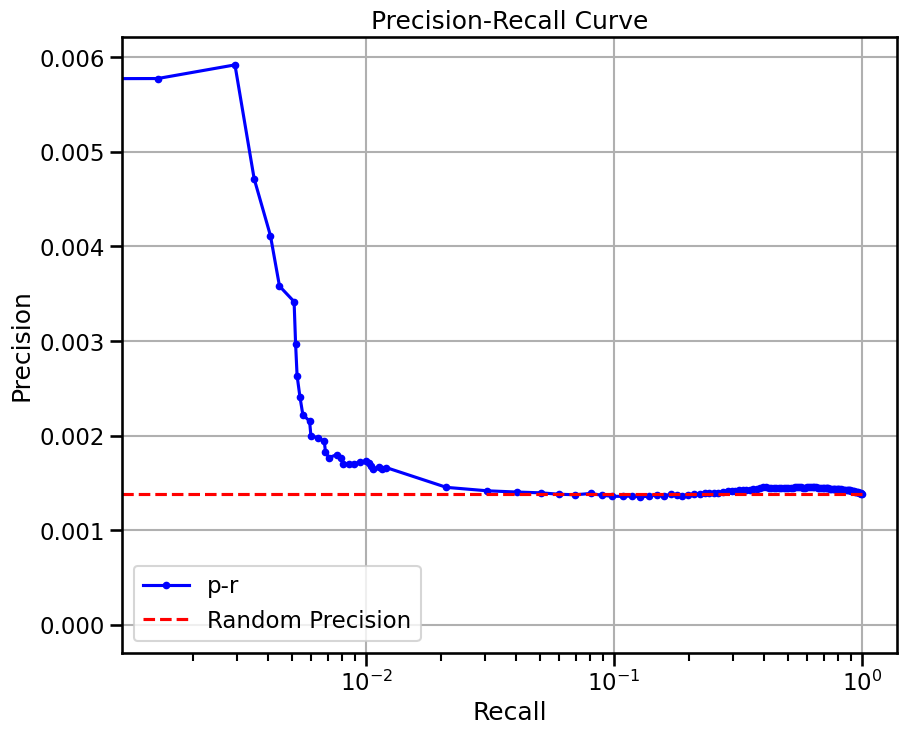

base enrichment


Top central genes: []


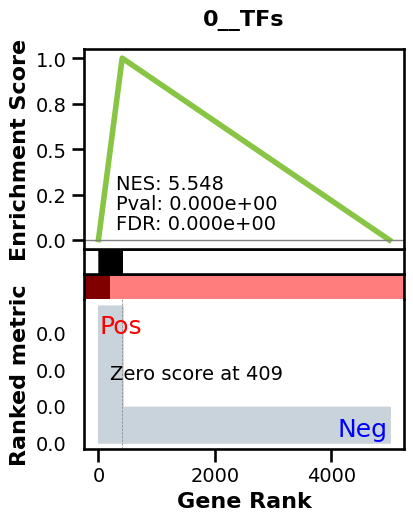

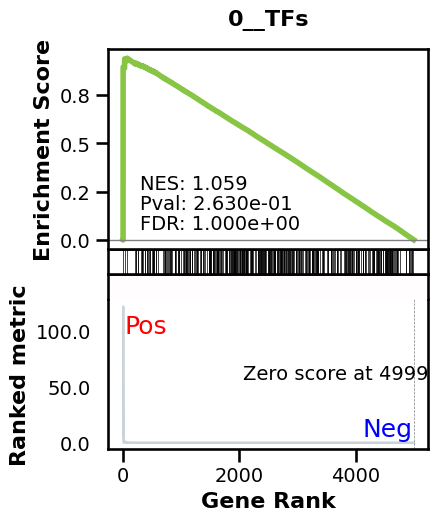

_________________________________________
TF specific enrichment


found some significant results for  7.407407407407407 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3169 genes
intersection pct: 0.6338
precision:  0.006449082630843438 
recall:  0.5156058530959418 
random precision: 0.001381856590518629


  0%|          | 0/128 [00:00<?, ?it/s]

  5%|▌         | 7/128 [00:00<00:01, 69.15it/s]

 11%|█         | 14/128 [00:00<00:01, 69.54it/s]

 17%|█▋        | 22/128 [00:00<00:01, 69.77it/s]

 23%|██▎       | 29/128 [00:00<00:01, 69.64it/s]

 28%|██▊       | 36/128 [00:00<00:01, 69.71it/s]

 34%|███▍      | 44/128 [00:00<00:01, 69.86it/s]

 41%|████      | 52/128 [00:00<00:01, 70.00it/s]

 47%|████▋     | 60/128 [00:00<00:00, 70.36it/s]

 53%|█████▎    | 68/128 [00:00<00:00, 70.51it/s]

 59%|█████▉    | 76/128 [00:01<00:00, 70.62it/s]

 66%|██████▌   | 84/128 [00:01<00:00, 70.55it/s]

 72%|███████▏  | 92/128 [00:01<00:00, 70.56it/s]

 78%|███████▊  | 100/128 [00:01<00:00, 70.18it/s]

 84%|████████▍ | 108/128 [00:01<00:00, 70.40it/s]

 91%|█████████ | 116/128 [00:01<00:00, 70.36it/s]

 97%|█████████▋| 124/128 [00:01<00:00, 70.22it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:756: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:01<00:00, 70.10it/s]

Area Under Precision-Recall Curve (AUPRC):  0.00412184575548459
EPR: 4.796520817419393


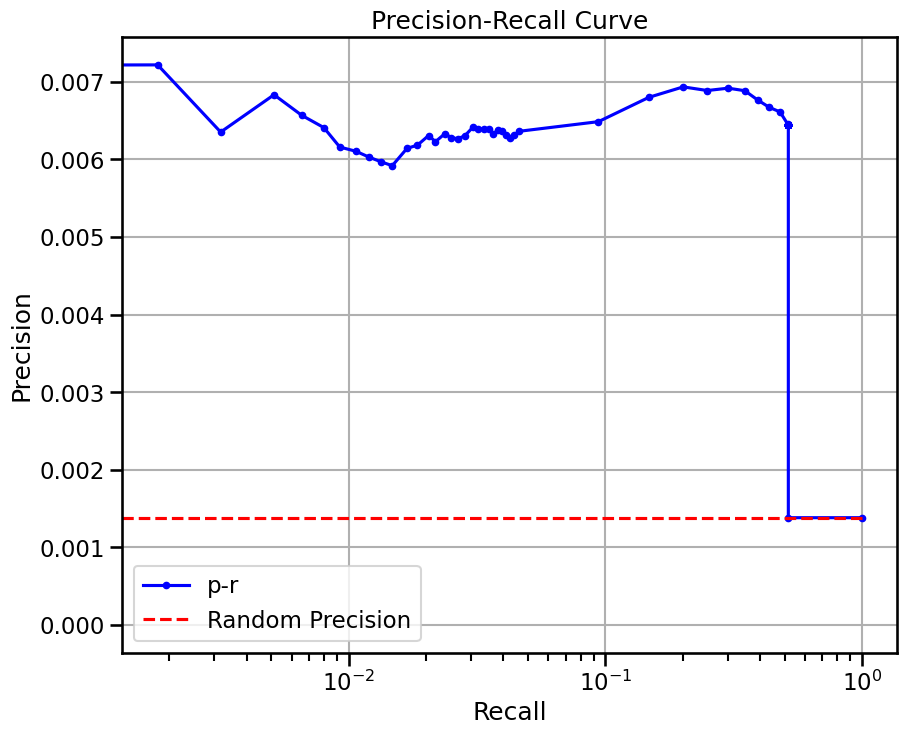

  0%|          | 0/64 [00:00<?, ?it/s]

  2%|▏         | 1/64 [00:03<03:11,  3.04s/it]

  3%|▎         | 2/64 [00:04<02:02,  1.97s/it]

  5%|▍         | 3/64 [00:05<01:39,  1.64s/it]

  6%|▋         | 4/64 [00:06<01:27,  1.47s/it]

  8%|▊         | 5/64 [00:07<01:21,  1.39s/it]

  9%|▉         | 6/64 [00:09<01:16,  1.33s/it]

 11%|█         | 7/64 [00:10<01:13,  1.29s/it]

 12%|█▎        | 8/64 [00:11<01:10,  1.26s/it]

 14%|█▍        | 9/64 [00:12<01:09,  1.26s/it]

 16%|█▌        | 10/64 [00:14<01:07,  1.25s/it]

 17%|█▋        | 11/64 [00:15<01:06,  1.25s/it]

 19%|█▉        | 12/64 [00:16<01:05,  1.26s/it]

 20%|██        | 13/64 [00:17<01:03,  1.24s/it]

 22%|██▏       | 14/64 [00:18<01:00,  1.22s/it]

 23%|██▎       | 15/64 [00:20<00:59,  1.21s/it]

 25%|██▌       | 16/64 [00:21<00:57,  1.20s/it]

 27%|██▋       | 17/64 [00:22<00:57,  1.22s/it]

 28%|██▊       | 18/64 [00:23<00:57,  1.24s/it]

 30%|██▉       | 19/64 [00:25<00:56,  1.26s/it]

 31%|███▏      | 20/64 [00:26<00:56,  1.28s/it]

 33%|███▎      | 21/64 [00:27<00:54,  1.27s/it]

 34%|███▍      | 22/64 [00:28<00:52,  1.25s/it]

 36%|███▌      | 23/64 [00:30<00:50,  1.24s/it]

 38%|███▊      | 24/64 [00:31<00:49,  1.24s/it]

 39%|███▉      | 25/64 [00:32<00:47,  1.22s/it]

 41%|████      | 26/64 [00:33<00:46,  1.21s/it]

 42%|████▏     | 27/64 [00:34<00:44,  1.21s/it]

 44%|████▍     | 28/64 [00:36<00:43,  1.21s/it]

 45%|████▌     | 29/64 [00:37<00:42,  1.21s/it]

 47%|████▋     | 30/64 [00:38<00:41,  1.21s/it]

 48%|████▊     | 31/64 [00:39<00:39,  1.21s/it]

 50%|█████     | 32/64 [00:41<00:38,  1.21s/it]

 52%|█████▏    | 33/64 [00:42<00:37,  1.21s/it]

 53%|█████▎    | 34/64 [00:43<00:36,  1.21s/it]

 55%|█████▍    | 35/64 [00:44<00:35,  1.21s/it]

 56%|█████▋    | 36/64 [00:45<00:34,  1.25s/it]

 58%|█████▊    | 37/64 [00:48<00:47,  1.75s/it]

 59%|█████▉    | 38/64 [00:50<00:41,  1.59s/it]

 61%|██████    | 39/64 [00:51<00:36,  1.48s/it]

 62%|██████▎   | 40/64 [00:52<00:33,  1.41s/it]

 64%|██████▍   | 41/64 [00:53<00:31,  1.38s/it]

 66%|██████▌   | 42/64 [00:55<00:29,  1.35s/it]

 67%|██████▋   | 43/64 [00:56<00:28,  1.34s/it]

 69%|██████▉   | 44/64 [00:57<00:26,  1.32s/it]

 70%|███████   | 45/64 [00:59<00:24,  1.30s/it]

 72%|███████▏  | 46/64 [01:00<00:23,  1.29s/it]

 73%|███████▎  | 47/64 [01:01<00:21,  1.28s/it]

 75%|███████▌  | 48/64 [01:02<00:20,  1.26s/it]

 77%|███████▋  | 49/64 [01:03<00:18,  1.24s/it]

 78%|███████▊  | 50/64 [01:05<00:17,  1.23s/it]

 80%|███████▉  | 51/64 [01:06<00:16,  1.24s/it]

 81%|████████▏ | 52/64 [01:07<00:14,  1.25s/it]

 83%|████████▎ | 53/64 [01:08<00:13,  1.23s/it]

 84%|████████▍ | 54/64 [01:10<00:12,  1.23s/it]

 86%|████████▌ | 55/64 [01:11<00:11,  1.23s/it]

 88%|████████▊ | 56/64 [01:12<00:09,  1.24s/it]

 89%|████████▉ | 57/64 [01:13<00:08,  1.24s/it]

 91%|█████████ | 58/64 [01:15<00:07,  1.24s/it]

 92%|█████████▏| 59/64 [01:16<00:06,  1.24s/it]

 94%|█████████▍| 60/64 [01:17<00:04,  1.22s/it]

 95%|█████████▌| 61/64 [01:18<00:03,  1.20s/it]

 97%|█████████▋| 62/64 [01:19<00:02,  1.18s/it]

 98%|█████████▊| 63/64 [01:21<00:01,  1.21s/it]

100%|██████████| 64/64 [01:22<00:00,  1.20s/it]

100%|██████████| 64/64 [01:22<00:00,  1.29s/it]

base enrichment


Top central genes: []
The DataFrame contains only the same values.


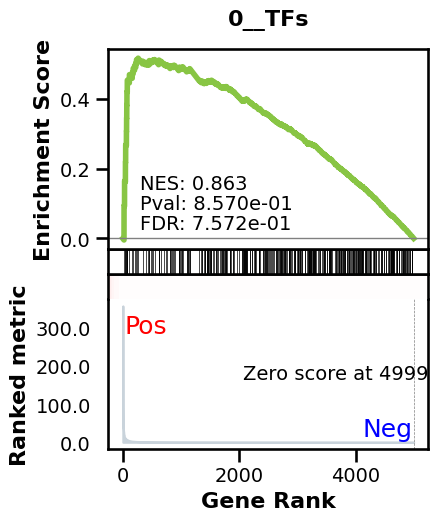

_________________________________________
TF specific enrichment


found some significant results for  36.36363636363637 % TFs

_________________________________________
loading GT,  omnipath


intersection of 2705 genes
intersection pct: 0.541
precision:  0.0012886384835366833 
recall:  1.0 
random precision: 0.0012891150510231984


  0%|          | 0/128 [00:00<?, ?it/s]

  8%|▊         | 10/128 [00:00<00:01, 97.78it/s]

 16%|█▌        | 20/128 [00:00<00:01, 97.94it/s]

 23%|██▎       | 30/128 [00:00<00:01, 97.62it/s]

 31%|███▏      | 40/128 [00:00<00:00, 97.73it/s]

 39%|███▉      | 50/128 [00:00<00:00, 97.82it/s]

 47%|████▋     | 60/128 [00:00<00:00, 97.89it/s]

 55%|█████▍    | 70/128 [00:00<00:00, 97.89it/s]

 62%|██████▎   | 80/128 [00:00<00:00, 97.98it/s]

 70%|███████   | 90/128 [00:00<00:00, 98.13it/s]

 78%|███████▊  | 100/128 [00:01<00:00, 98.19it/s]

 86%|████████▌ | 110/128 [00:01<00:00, 98.15it/s]

 94%|█████████▍| 120/128 [00:01<00:00, 97.85it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:756: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:01<00:00, 97.90it/s]

Area Under Precision-Recall Curve (AUPRC):  0.0013660753467384574
EPR: 0.6575809985125273


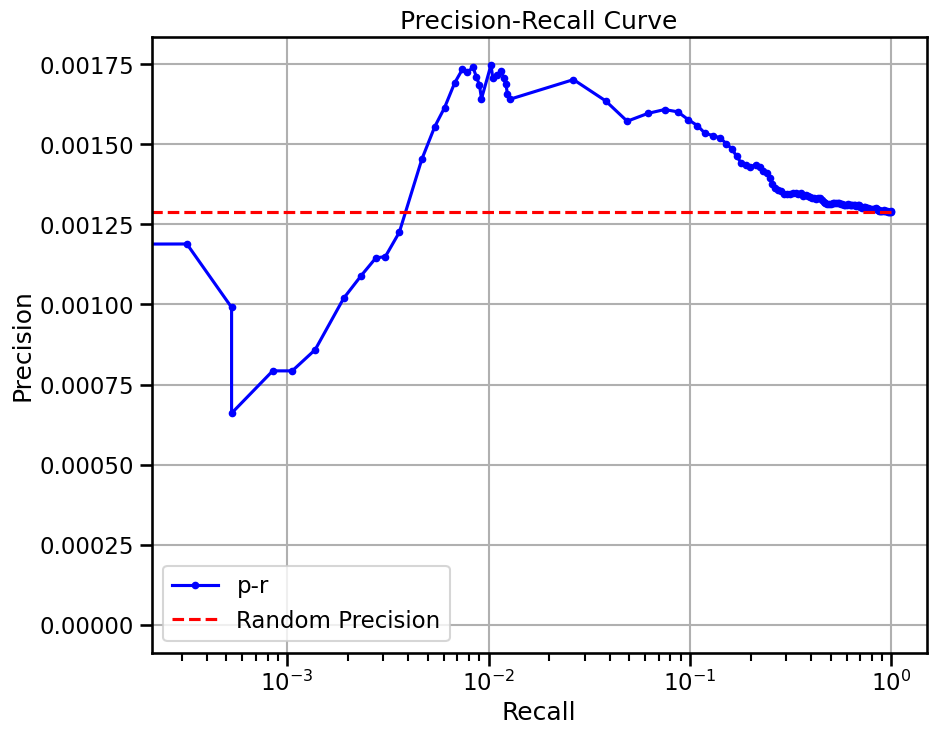

base enrichment


Top central genes: []


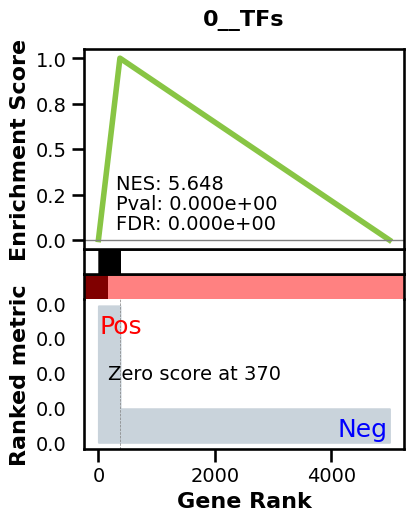

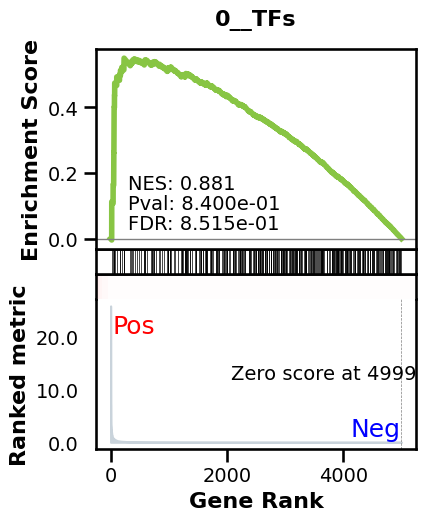

_________________________________________
TF specific enrichment


found some significant results for  9.090909090909092 % TFs

_________________________________________
loading GT,  omnipath


intersection of 2705 genes
intersection pct: 0.541
precision:  0.007002614850547766 
recall:  0.6589245943366211 
random precision: 0.0012891150510231984


  0%|          | 0/128 [00:00<?, ?it/s]

  8%|▊         | 10/128 [00:00<00:01, 95.33it/s]

 16%|█▌        | 20/128 [00:00<00:01, 95.55it/s]

 23%|██▎       | 30/128 [00:00<00:01, 95.53it/s]

 31%|███▏      | 40/128 [00:00<00:00, 95.53it/s]

 39%|███▉      | 50/128 [00:00<00:00, 95.52it/s]

 47%|████▋     | 60/128 [00:00<00:00, 95.56it/s]

 55%|█████▍    | 70/128 [00:00<00:00, 95.51it/s]

 62%|██████▎   | 80/128 [00:00<00:00, 95.52it/s]

 70%|███████   | 90/128 [00:00<00:00, 95.46it/s]

 78%|███████▊  | 100/128 [00:01<00:00, 95.50it/s]

 86%|████████▌ | 110/128 [00:01<00:00, 95.52it/s]

 94%|█████████▍| 120/128 [00:01<00:00, 95.50it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:756: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:01<00:00, 95.44it/s]

Area Under Precision-Recall Curve (AUPRC):  0.005163143775348313
EPR: 6.338245364646802


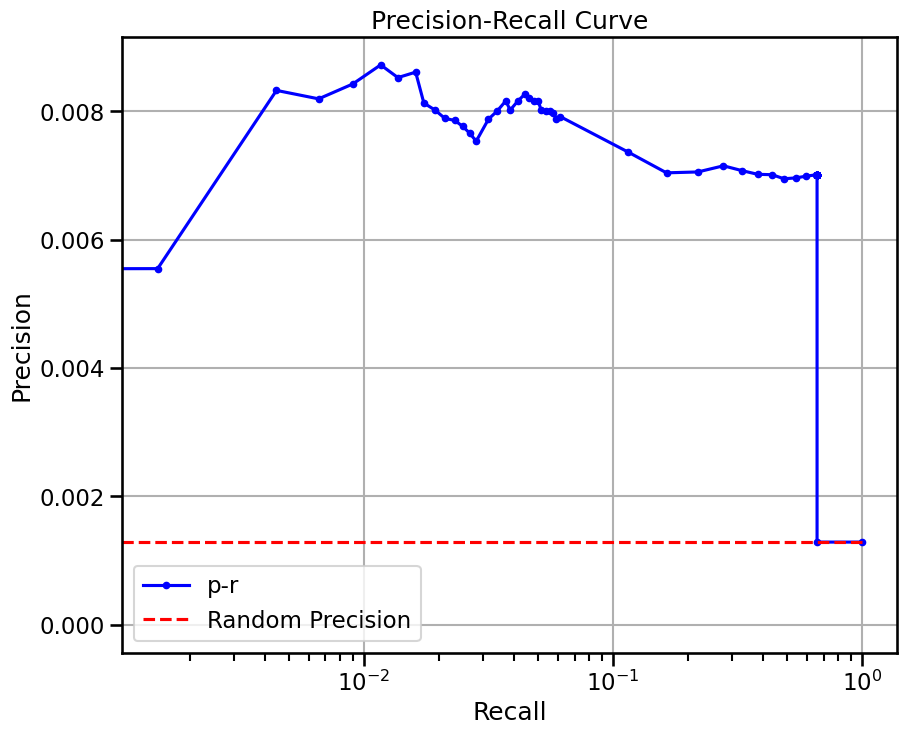

base enrichment


Top central genes: []
The DataFrame contains only the same values.


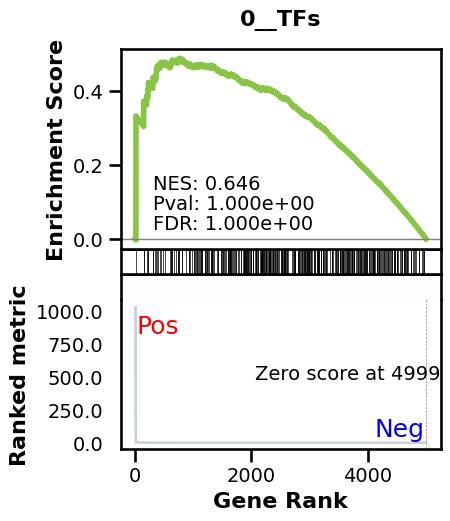

_________________________________________
TF specific enrichment


found some significant results for  9.090909090909092 % TFs

_________________________________________
loading GT,  omnipath


intersection of 2705 genes
intersection pct: 0.541
precision:  0.0012886384835366833 
recall:  1.0 
random precision: 0.0012891150510231984


  0%|          | 0/128 [00:00<?, ?it/s]

  8%|▊         | 10/128 [00:00<00:01, 98.83it/s]

 16%|█▌        | 20/128 [00:00<00:01, 98.91it/s]

 23%|██▎       | 30/128 [00:00<00:00, 98.86it/s]

 31%|███▏      | 40/128 [00:00<00:00, 98.75it/s]

 39%|███▉      | 50/128 [00:00<00:00, 98.56it/s]

 47%|████▋     | 60/128 [00:00<00:00, 98.23it/s]

 55%|█████▍    | 70/128 [00:00<00:00, 98.18it/s]

 62%|██████▎   | 80/128 [00:00<00:00, 98.43it/s]

 70%|███████   | 90/128 [00:00<00:00, 98.26it/s]

 78%|███████▊  | 100/128 [00:01<00:00, 98.17it/s]

 86%|████████▌ | 110/128 [00:01<00:00, 98.22it/s]

 94%|█████████▍| 120/128 [00:01<00:00, 98.42it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:756: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:01<00:00, 98.37it/s]

Area Under Precision-Recall Curve (AUPRC):  0.0011111969378814462
EPR: 0.49297628192893606


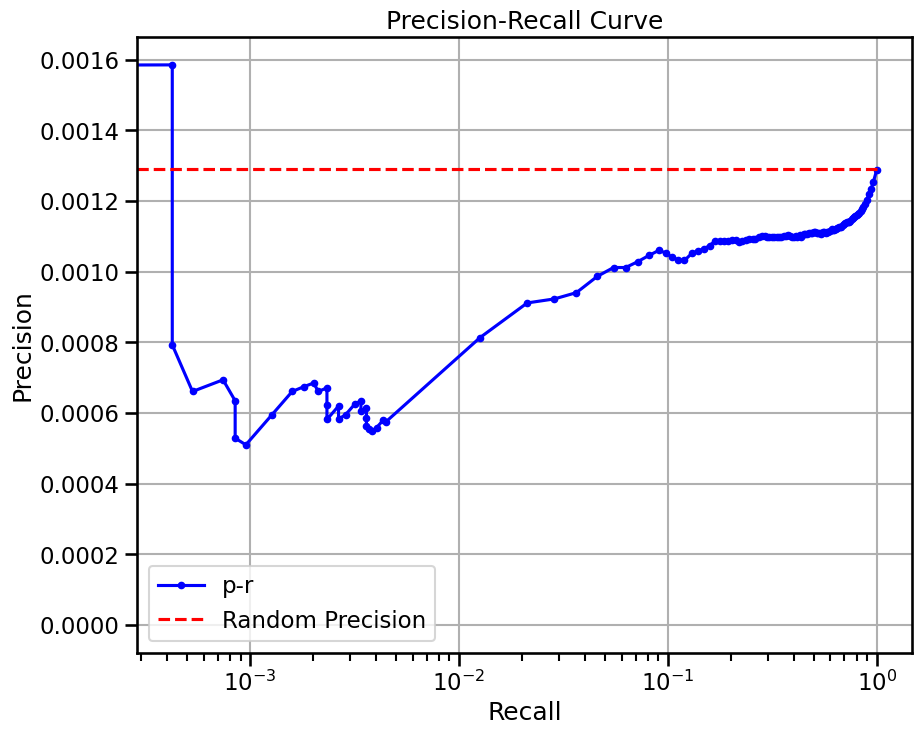

base enrichment


Top central genes: []


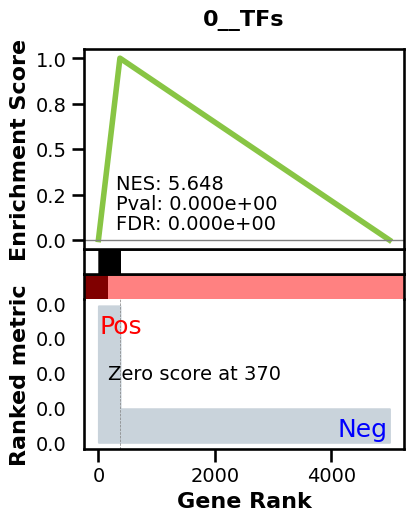

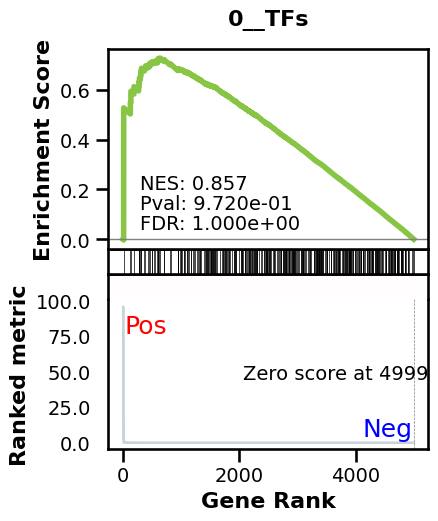

_________________________________________
TF specific enrichment


found some significant results for  0.0 % TFs

_________________________________________
loading GT,  omnipath


intersection of 2705 genes
intersection pct: 0.541
precision:  0.007002614850547766 
recall:  0.6589245943366211 
random precision: 0.0012891150510231984


  0%|          | 0/128 [00:00<?, ?it/s]

  8%|▊         | 10/128 [00:00<00:01, 95.25it/s]

 16%|█▌        | 20/128 [00:00<00:01, 95.46it/s]

 23%|██▎       | 30/128 [00:00<00:01, 95.82it/s]

 31%|███▏      | 40/128 [00:00<00:00, 96.95it/s]

 39%|███▉      | 50/128 [00:00<00:00, 96.47it/s]

 47%|████▋     | 60/128 [00:00<00:00, 95.96it/s]

 55%|█████▍    | 70/128 [00:00<00:00, 95.78it/s]

 62%|██████▎   | 80/128 [00:00<00:00, 95.62it/s]

 70%|███████   | 90/128 [00:00<00:00, 95.52it/s]

 78%|███████▊  | 100/128 [00:01<00:00, 95.55it/s]

 86%|████████▌ | 110/128 [00:01<00:00, 95.50it/s]

 94%|█████████▍| 120/128 [00:01<00:00, 94.71it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:756: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:01<00:00, 95.46it/s]

Area Under Precision-Recall Curve (AUPRC):  0.004554632543181792
EPR: 2.6437855784580675


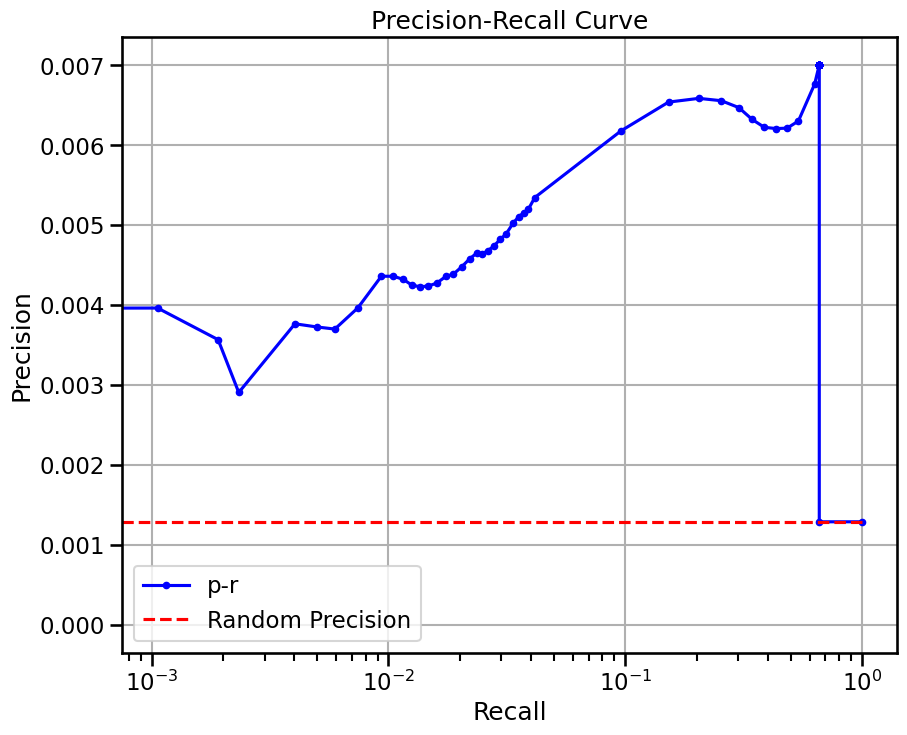

In [6]:
metrics = {}
clf_omni = None
for celltype in CELLTYPES:
    #grn_inferer = GRNfer(model, adata[adata.X.sum(1) > 500],
    #                    how="random expr",
    #                    preprocess="softmax",
    #                    head_agg='mean',
    #                    filtration="none",
    #                    forward_mode="denoise",
    #                    num_genes=2200,
    #                    max_cells=MAXCELLS,
    #                    doplot=False,
    #                    batch_size=32,
    #                    )
    #grn = grn_inferer(layer=list(range(model.nlayers))[:], cell_type=celltype)
    #grn.var.index = make_index_unique(grn.var['symbol'].astype(str))
    #metrics[celltype+'_scprint_full'] = BenGRN(grn).scprint_benchmark()
    #del grn
    grn_inferer = GRNfer(model, adata[adata.X.sum(1) > 500],
                        how="most var across",
                        preprocess="softmax",
                        head_agg='none',
                        filtration="none",
                        forward_mode="denoise",
                        num_genes=NUM_GENES,
                        max_cells=1024,
                        doplot=False,
                        batch_size=16,
                        )
    grn = grn_inferer(layer=list(range(model.nlayers))[:], cell_type=celltype)
    grn.var.index = make_index_unique(grn.var['symbol'].astype(str))
    grn.varp['all'] = grn.varp['GRN']
    grn.varp['GRN'] = grn.varp['GRN'][:,:,:].mean(-1)
    metrics[celltype+'_scprint_mean'] = BenGRN(grn).scprint_benchmark()
    grn.varp['GRN'][~grn.var.isTF,:]=0
    metrics[celltype+'_scprint_tf_mean'] = BenGRN(grn).scprint_benchmark()
    if clf_omni == None:
        grn.varp['GRN'] = grn.varp['all']
        _, m, clf_omni = train_classifier(grn, C=1, train_size=0.6, class_weight={
                                        1: 200, 0: 1}, shuffle=True, max_iter=200, return_full=False)
        joblib.dump(clf_omni, 'clf_omni.pkl')
    grn.varp['GRN'] = grn.varp['all'][:,:,clf_omni.coef_[0] > 0].mean(-1)
    metrics[celltype+'_scprint_class'] = BenGRN(grn).scprint_benchmark()
    grn.varp['GRN'][~grn.var.isTF,:]=0
    metrics[celltype+'_scprint_tf_class'] = BenGRN(grn).scprint_benchmark()
    del grn

In [7]:
metrics

{'kidney distal convoluted tubule epithelial cell_scprint_mean': {'enriched_terms_Regulators': ['celltype.gmt__Distal tubule cells',
   'celltype.gmt__Beta cells',
   'celltype.gmt__Cholangiocytes',
   'celltype.gmt__Loop of Henle cells',
   'celltype.gmt__Proximal tubule cells',
   'celltype.gmt__Ductal cells',
   'celltype.gmt__Gamma (PP) cells',
   'celltype.gmt__Connecting tubule cells'],
  'significant_enriched_TFtargets': 14.705882352941176,
  'precision': 0.0008261483363013599,
  'recall': 1.0,
  'rand_precision': 0.0008263855307705822,
  'auprc': 0.0008763312851398199,
  'epr': 2.6620469453287052},
 'kidney distal convoluted tubule epithelial cell_scprint_tf_mean': {'enriched_terms_Central': ['0__TFs',
   'celltype.gmt__Embryonic stem cells',
   'celltype.gmt__Enteric neurons',
   'celltype.gmt__Microfold cells',
   'celltype.gmt__Melanocytes',
   'celltype.gmt__Kupffer cells',
   'celltype.gmt__Hepatoblasts',
   'celltype.gmt__Satellite cells'],
  'TF_enr': True,
  'enriched_t

In [8]:
import pandas as pd

In [9]:
res = []
for k, v in metrics.items():
    res.append([k.split('_')[-1], k.split('_')[0], v['epr'], v['auprc'], v['rand_precision'], v['significant_enriched_TFtargets'], v.get('TF_enr', False), 'tf_' in k])

df = pd.DataFrame(res, columns=['tools','name','EPR', 'AUPRC', 'RAND', 'TF_targ', 'TF_enr', 'TF_only'])
df

,tools,name,EPR,AUPRC,RAND,TF_targ,TF_enr,TF_only
0,mean,kidney distal convoluted tubule epithelial cell,2.662047,0.000876,0.000826,14.705882,False,False
1,mean,kidney distal convoluted tubule epithelial cell,4.246105,0.001663,0.000826,17.647059,True,True
2,class,kidney distal convoluted tubule epithelial cell,4.979990,0.000994,0.000826,2.941176,False,False
3,class,kidney distal convoluted tubule epithelial cell,12.416586,0.002227,0.000826,8.823529,True,True
4,mean,kidney collecting duct principal cell,0.713462,0.001399,0.001259,15.625000,False,False
5,mean,kidney collecting duct principal cell,7.304394,0.004012,0.001259,9.375000,True,True
6,class,kidney collecting duct principal cell,1.737159,0.001889,0.001259,6.250000,False,False
7,class,kidney collecting duct principal cell,12.323730,0.005571,0.001259,4.687500,True,True
8,mean,blood vessel smooth muscle cell,1.618166,0.001737,0.001573,29.090909,False,False
9,mean,blood vessel smooth muscle cell,7.582060,0.005076,0.001573,9.090909,True,True
